<a href="https://colab.research.google.com/github/JVR27XD/SAM/blob/main/SAMVSUNET/SAMVSUNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Organización y división del dataset (80/20) a partir de imágenes .jpg y máscaras .json

Busca pares imagen/máscara en una carpeta (por ejemplo, imagen.jpg y imagen.json), baraja y divide esos pares en entrenamiento (80%) y validación (20%), crea la estructura de directorios de destino y copia cada archivo a su subcarpeta correspondiente (train/img, train/masks, val/img, val/masks). Al final, deja el dataset listo para ser usado por las clases de Dataset o funciones de entrenamiento.

In [ ]:
import os
import glob
import random
import shutil # Necesario para copiar archivos
from tqdm import tqdm

# 1. Ruta a la carpeta que contiene el Dataset
source_labeled_dir = "/content/drive/MyDrive/Colab Notebooks/SolDef_AI/Labeled/"

# 2. Ruta para la nueva organización
target_base_dir = "/content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20"

# 3. Extensión de las máscaras JSON
json_mask_extension = ".json"

# 4. Extensión de las imagenes
img_extension = ".jpg"

# 5. Proporción para entrenamiento (el resto será validación 20%)
train_split_ratio = 0.8

# 6. Semilla aleatoria para reproducibilidad de la división
random_seed = 42
# -------------------------------------

print(f"Directorio de origen (Labeled): {source_labeled_dir}")
print(f"Directorio de destino (Organizado): {target_base_dir}")
print(f"Extensión de Máscara esperada: '{json_mask_extension}'")

#  1. Encontrar todos los pares Imagen/Máscara en la carpeta Labeled
all_json_files = glob.glob(os.path.join(source_labeled_dir, f"*{json_mask_extension}"))
labeled_basenames = []
print(f"\nBuscando pares imagen ({img_extension}) / máscara ({json_mask_extension})...")
for json_path in all_json_files:
    base_name = os.path.basename(json_path).replace(json_mask_extension, "")
    img_path = os.path.join(source_labeled_dir, base_name + img_extension)
    if os.path.exists(img_path):
        labeled_basenames.append(base_name)


num_pairs = len(labeled_basenames)
print(f"Se encontraron {num_pairs} pares imagen/máscara etiquetados.")

if num_pairs == 0:
    print("\n¡ERROR! No se encontraron pares. Revisa la ruta 'source_labeled_dir' y las extensiones.")
else:
    #  2. Barajar y Dividir
    print(f"\nBarajando y dividiendo {num_pairs} pares en {train_split_ratio*100:.0f}% train / {(1-train_split_ratio)*100:.0f}% val...")
    random.seed(random_seed)
    random.shuffle(labeled_basenames)

    split_idx = int(train_split_ratio * num_pairs)
    train_basenames = labeled_basenames[:split_idx]
    val_basenames = labeled_basenames[split_idx:]

    print(f"División resultante: {len(train_basenames)} entrenamiento, {len(val_basenames)} validación.")

    #  3. Crear Carpetas de Destino
    print(f"\nCreando estructura de carpetas en: {target_base_dir}")
    train_img_target = os.path.join(target_base_dir, "train", "img")
    train_mask_target = os.path.join(target_base_dir, "train", "masks")
    val_img_target = os.path.join(target_base_dir, "val", "img")
    val_mask_target = os.path.join(target_base_dir, "val", "masks")

    os.makedirs(train_img_target, exist_ok=True)
    os.makedirs(train_mask_target, exist_ok=True)
    os.makedirs(val_img_target, exist_ok=True)
    os.makedirs(val_mask_target, exist_ok=True)
    print("Estructura creada.")

    #  4. Copiar Archivos
    print("\nCopiando archivos de entrenamiento...")
    for base_name in tqdm(train_basenames, desc="Train Copy"):
         img_src = os.path.join(source_labeled_dir, base_name + img_extension)
         mask_src = os.path.join(source_labeled_dir, base_name + json_mask_extension)
         # Comprobar existencia por si acaso
         if os.path.exists(img_src) and os.path.exists(mask_src):
              shutil.copy2(img_src, os.path.join(train_img_target, base_name + img_extension)) # copy2 preserva metadatos
              shutil.copy2(mask_src, os.path.join(train_mask_target, base_name + json_mask_extension))

    print("Copiando archivos de validación...")
    for base_name in tqdm(val_basenames, desc="Valid Copy"):
         img_src = os.path.join(source_labeled_dir, base_name + img_extension)
         mask_src = os.path.join(source_labeled_dir, base_name + json_mask_extension)
         # Comprobar existencia
         if os.path.exists(img_src) and os.path.exists(mask_src):
              shutil.copy2(img_src, os.path.join(val_img_target, base_name + img_extension))
              shutil.copy2(mask_src, os.path.join(val_mask_target, base_name + json_mask_extension))

    print("-" * 30)
    print("¡Proceso de división y reorganización completado!")

Directorio de origen (Labeled): /content/drive/MyDrive/Colab Notebooks/SolDef_AI/Labeled/
Directorio de destino (Organizado): /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20
Extensión de Máscara esperada: '.json'

Buscando pares imagen (.jpg) / máscara (.json)...
Se encontraron 428 pares imagen/máscara etiquetados.

Barajando y dividiendo 428 pares en 80% train / 20% val...
División resultante: 342 entrenamiento, 86 validación.

Creando estructura de carpetas en: /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20
Estructura creada.

Copiando archivos de entrenamiento...


Train Copy: 100%|██████████| 342/342 [03:54<00:00,  1.46it/s]


Copiando archivos de validación...


Valid Copy: 100%|██████████| 86/86 [00:02<00:00, 35.41it/s]

------------------------------
¡Proceso de división y reorganización completado!
Revisa la carpeta '/content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20' para ver los datos organizados.
------------------------------

RECORDATORIO:
1. Ahora, para entrenar/evaluar Task 2, usa '/content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20' como ruta base.
2. Asegúrate de que la clase PcbDataset use la extensión de máscara correcta ('.json') en su inicialización.
3. ¡No olvides confirmar el formato INTERNO de los archivos JSON (bitmap o polígonos) y ajustar PcbDataset.__getitem__ si es necesario!


In [ ]:
# Para instalar la biblioteca de SAM desde GitHub:
!pip install git+https://github.com/facebookresearch/segment-anything.git

# Para instalar Pillow (si no estuviera ya):
!pip install Pillow

!pip install segmentation-models-pytorch supervisely albumentations pandas tqdm matplotlib torchinfo

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-mjeqcxv_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-mjeqcxv_
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
import albumentations as A
from albumentations.pytorch import ToTensorV2
import supervisely as sly
import numpy as np
import cv2
import os
import glob
import json
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

print("Imports para evaluación cargados.")

Imports para evaluación cargados.


# Configuración e Hiperparámetros del Experimento
Este bloque define las rutas de trabajo, parámetros de entrenamiento y mapeo de clases necesarios para entrenar el modelo de segmentación (en este caso U-Net con backbone ResNet34). El dispositivo de cómputo, los hiperparámetros de entrenamiento (tasa de aprendizaje, batch size, épocas, etc.), la lógica de early stopping y la definición de las clases a segmentar en cada tarea.

In [ ]:

# 1. Configuración / Hiperparámetros

# --- Rutas ---
DRIVE_MYDRIVE_PATH = "/content/drive/MyDrive/"
COLAB_NOTEBOOKS_FOLDER_PATH = os.path.join(DRIVE_MYDRIVE_PATH, "Colab Notebooks")
MODEL_SAVE_PATH = os.path.join(COLAB_NOTEBOOKS_FOLDER_PATH, "modelos_guardados/") # Donde guardar checkpoints

# --- Definir rutas para AMBAS tareas ---
DATASET_PATH_TASK1 = os.path.join(COLAB_NOTEBOOKS_FOLDER_PATH, "FPIC-Component/")
DATASET_PATH_TASK2 = os.path.join(COLAB_NOTEBOOKS_FOLDER_PATH, "SolDef_AI_Organized_80_20/")

# --- Selección de Tarea ---
TASK = "Task2"
# --- Seleccionar ruta base ---
if TASK == "Task1":
    base_path = DATASET_PATH_TASK1
    print(f"Usando dataset Task 1: {base_path}")
elif TASK == "Task2":
    base_path = DATASET_PATH_TASK2
    print(f"Usando dataset Task 2: {base_path}")
else:
    raise ValueError(f"Task desconocida: {TASK}")

#Define la arquitectura base del modelo (ResNet34 como encoder).
#Hiperparámetros clave: tasa de aprendizaje, tamaño de lote y número de épocas.
#Selección automática de GPU si está disponible, o CPU en caso contrario.

# --- Modelo ---
BACKBONE = "resnet34"

# --- Hiperparámetros Entrenamiento ---
LEARNING_RATE = 1e-4
BATCH_SIZE = 4
NUM_EPOCHS = 100
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

#Early stopping detiene el entrenamiento si durante 15 épocas consecutivas no mejora la métrica valid_iou (IoU en validación).Evita sobreentrenamiento y ahorra tiempo.

# --- Early Stopping ---
EARLY_STOPPING_PATIENCE = 15
METRIC_TO_MONITOR = 'valid_iou'
BEST_MODEL_FILENAME = f"unet_{BACKBONE}_{TASK.lower()}_best_epoch_v1.pth"
full_model_save_path = os.path.join(MODEL_SAVE_PATH, BEST_MODEL_FILENAME)
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

CLASS_MAPPING_TASK2 = {
    "good": 1,         # 'good'
    "exc_solder": 2,   # 'exceso'
    "poor_solder": 3,  # 'falta'
    "spike": 4         # 'pico'
}
num_classes_task2 = len(CLASS_MAPPING_TASK2) + 1

if TASK == "Task1":
     CLASS_MAPPING = { "R": 1, "C": 2, "U": 3, "Q": 4, "J": 5, "L": 6, "RA": 7, "D": 8, "RN": 9, "TP": 10, "IC": 11, "P": 12, "CR": 13, "M": 14, "BTN": 15, "FB": 16, "CRA": 17, "SW": 18, "T": 19, "F": 20, "V": 21, "LED": 22, "S": 23, "QA": 24, "JP": 25 }
     num_classes = len(CLASS_MAPPING) + 1 # 26 clases (0-25)
elif TASK == "Task2":
     CLASS_MAPPING = CLASS_MAPPING_TASK2
     num_classes = len(CLASS_MAPPING)
     num_classes = len(CLASS_MAPPING) + 1 # Asumiendo que 0 será fondo
else:
    raise ValueError("TASK no válida para definir CLASS_MAPPING")


print(f"Configuración: Task={TASK}, Backbone={BACKBONE}, LR={LEARNING_RATE}, BatchSize={BATCH_SIZE}, Device={DEVICE}, NumClasses={num_classes}")
print(f"Early Stopping: Patience={EARLY_STOPPING_PATIENCE}, Monitor={METRIC_TO_MONITOR}")
print(f"Modelo se guardará en: {full_model_save_path}")
print(f"Mapeo de Clases Usado: {CLASS_MAPPING}")

Usando dataset Task 2: /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/
Configuración: Task=Task2, Backbone=resnet34, LR=0.0001, BatchSize=4, Device=cuda, NumClasses=5
Early Stopping: Patience=15, Monitor=valid_iou
Modelo se guardará en: /content/drive/MyDrive/Colab Notebooks/modelos_guardados/unet_resnet34_task2_best_epoch_v1.pth
Mapeo de Clases Usado: {'good': 1, 'exc_solder': 2, 'poor_solder': 3, 'spike': 4}


In [ ]:
# ==========================================================
# 2. Definición de la Clase Dataset Personalizada
# ==========================================================
class PcbDataset(Dataset):

    def __init__(self, image_dir, mask_dir, class_mapping=None, augmentation=None, preprocessing=None):

        """
        Args:
            image_dir (str): Directorio que contiene las imágenes.
            mask_dir (str): Directorio que contiene las máscaras.
            augmentation (callable, optional): Pipeline de Albumentations para aumento.
            preprocessing (callable, optional): Pipeline de Albumentations/Torchvision para preprocesamiento.
        """
        print(f"Inicializando Dataset...")
        print(f"Directorio de imágenes: {image_dir}")
        print(f"Directorio de máscaras: {mask_dir}")

        # --- Lógica para obtener lista de rutas ---

        # 1. Definir patrones de extensión
        img_extensions = ['*.png', '*.jpg', '*.jpeg', '*.bmp', '*.tif']
        mask_extensions = ['*.json']
        # 2. Encontrar archivos usando glob
        image_paths_list = []
        for ext in img_extensions:
            image_paths_list.extend(glob.glob(os.path.join(image_dir, ext)))


        mask_paths_list = []
        for ext in mask_extensions:
            mask_paths_list.extend(glob.glob(os.path.join(mask_dir, ext)))


        # 3. Ordenar para asegurar correspondencia por nombre
        #    Se ordena la lista completa encontrada por glob
        image_paths_list = sorted(image_paths_list)
        mask_paths_list = sorted(mask_paths_list)

        # 4. VERIFICACIÓN IMPORTANTE (Usando las listas locales ANTES de asignar a self)
        if not image_paths_list: # Más pythonico que len() == 0
            raise FileNotFoundError(f"¡ERROR! No se encontraron imágenes en '{image_dir}' con las extensiones {img_extensions}")
        if not mask_paths_list:
            raise FileNotFoundError(f"¡ERROR! No se encontraron máscaras en '{mask_dir}' con las extensiones {mask_extensions}")

        # Comprobar si el número coincide EXACTAMENTE
        if len(image_paths_list) != len(mask_paths_list):
            print(f"¡ADVERTENCIA! Número diferente de imágenes ({len(image_paths_list)}) y máscaras ({len(mask_paths_list)}).")
            # Intentar emparejar por nombre base como solución alternativa
            img_basenames = {os.path.splitext(os.path.basename(p))[0] for p in image_paths_list}
            msk_basenames = {os.path.splitext(os.path.basename(p))[0] for p in mask_paths_list}
            common_basenames = sorted(list(img_basenames.intersection(msk_basenames)))

            if not common_basenames:
                raise ValueError(f"¡ERROR! Discrepancia de archivos ({len(image_paths_list)} imgs vs {len(mask_paths_list)} masks) y sin nombres base comunes para emparejar.")

            print(f"-> Usando {len(common_basenames)} pares con nombres base coincidentes encontrados.")

            # Crear diccionarios para búsqueda rápida de rutas completas por nombre base
            img_map = {os.path.splitext(os.path.basename(p))[0]: p for p in image_paths_list}
            msk_map = {os.path.splitext(os.path.basename(p))[0]: p for p in mask_paths_list}

            # Construir las listas finales usando solo los nombres base comunes
            self.image_paths = [img_map[name] for name in common_basenames]
            self.mask_paths = [msk_map[name] for name in common_basenames]

            # Doble chequeo por si acaso algo falló en la lógica anterior
            if not self.image_paths:
                raise ValueError("¡ERROR! No quedaron pares imagen/máscara después de intentar emparejar por nombre.")

        else:
             self.image_paths = image_paths_list
             self.mask_paths = mask_paths_list

        # --- Fin Lógica __init__ ---

        self.augmentation = augmentation
        self.preprocessing = preprocessing
        self.class_mapping = class_mapping if class_mapping is not None else {}


        print(f"Dataset inicializado con {len(self.image_paths)} muestras emparejadas.")

    def __len__(self):
        # Devuelve el número total de muestras (pares imagen/máscara)

        return len(self.image_paths)

   # Dentro de la clase PcbDataset:

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]

        # 1. Cargar Imagen
        try:
            image = cv2.imread(image_path)
            if image is None: raise IOError(f"No se pudo cargar imagen: {image_path}")
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            height, width = image.shape[:2]
        except Exception as img_err:
            print(f"[ERROR] Cargando imagen {image_path}: {img_err}")
            raise img_err

        # 2. Crear Lienzo de Máscara Vacío
        mask_canvas = np.zeros((height, width), dtype=np.int64) # Usar int64 para loss

        # 3. Leer y Procesar JSON de Anotación (Formato LabelMe con Polígonos)
        try:
            with open(mask_path, 'r', encoding='utf-8') as f:
                annotation_data = json.load(f)


            # *** LÓGICA MODIFICADA PARA POLÍGONOS ***
            shapes = annotation_data.get('shapes', [])
            for shape in shapes:
                class_title = shape.get('label')
                points_list = shape.get('points')
                shape_type = shape.get('shape_type') # LabelMe guarda el tipo

                # Asegurarse de que es un polígono y tenemos puntos y clase
                if class_title and points_list and shape_type in ['polygon', 'rectangle']:
                    # Obtener el ID numérico de la clase desde el mapping
                    # ¡ASEGÚRATE de pasar el class_mapping correcto al crear el Dataset!
                    # (class_mapping_dataset_1 o class_mapping_dataset_2)
                    class_value = self.class_mapping.get(class_title, 0) # Usa el mapping pasado en __init__

                    if class_value > 0: # Solo procesar si es una clase mapeada (no fondo)
                        try:
                            # Convertir puntos a formato NumPy int32 para OpenCV
                            # LabelMe da [[x1,y1], [x2,y2]...]
                            polygon_points = np.array(points_list, dtype=np.int32)

                            # Crear una máscara temporal solo para este polígono
                            temp_mask = np.zeros((height, width), dtype=np.uint8)
                            # Dibujar y rellenar el polígono con valor 1
                            cv2.fillPoly(temp_mask, [polygon_points], 1)

                            # Convertir a booleano
                            object_mask_bool = (temp_mask == 1)

                            # Pintar en el lienzo principal con el ID de clase
                            # (Las formas posteriores pueden sobrescribir anteriores si se solapan)
                            mask_canvas[object_mask_bool] = class_value

                        except Exception as poly_err:
                            print(f"[ERROR] Procesando polígono para clase '{class_title}' en {mask_path}: {poly_err}")


        except FileNotFoundError: print(f"[ERROR] Máscara no encontrada: {mask_path}. Usando máscara vacía.")
        except Exception as json_err: print(f"[ERROR] Procesando JSON {mask_path}: {json_err}. Usando máscara vacía.")

        # 4. Máscara Final (ya está en int64)
        mask = mask_canvas

        # 5. Aplicar Aumentos
        if self.augmentation:
            try:
                augmented = self.augmentation(image=image, mask=mask)
                image = augmented['image']; mask = augmented['mask']
            except Exception as aug_err: print(f"[ERROR] Augmentation: {aug_err}"); raise aug_err

        # 6. Aplicar Preprocesamiento
        if self.preprocessing:
             try:
                processed = self.preprocessing(image=image, mask=mask)
                image = processed['image']; mask = processed['mask']
             except Exception as pre_err: print(f"[ERROR] Preprocessing: {pre_err}"); raise pre_err

        return image, mask

In [ ]:
# --- Rutas específicas Train/Valid (VERIFICA NOMBRES 'train', 'val', 'img', 'masks') ---
TRAIN_IMG_DIR = os.path.join(base_path, 'train', 'img')
TRAIN_MASK_DIR = os.path.join(base_path, 'train', 'masks')
VALID_IMG_DIR = os.path.join(base_path, 'val', 'img')
VALID_MASK_DIR = os.path.join(base_path, 'val', 'masks')
print(f"Usando directorios:")
print(f"  Train Img : {TRAIN_IMG_DIR}")
print(f"  Train Mask: {TRAIN_MASK_DIR}")
print(f"  Valid Img : {VALID_IMG_DIR}")
print(f"  Valid Mask: {VALID_MASK_DIR}")

# --- Transformaciones ---
# Ajusta los aumentos si quieres más
train_augmentation = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
])

# ¡ASEGÚRATE DE DESCOMENTAR Y AJUSTAR RESIZE!
preprocessing = A.Compose([
    A.Resize(height=384, width=384), # <--- AJUSTA TAMAÑO
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

Usando directorios:
  Train Img : /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/train/img
  Train Mask: /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/train/masks
  Valid Img : /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/val/img
  Valid Mask: /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/val/masks


# Creación de Datasets y DataLoaders (train/valid) con PyTorch

In [ ]:
 #--- Crear Instancias ---
try:
    train_dataset = PcbDataset(
        image_dir=TRAIN_IMG_DIR, mask_dir=TRAIN_MASK_DIR,
        class_mapping=CLASS_MAPPING, # <--- Pasar el mapping
        augmentation=train_augmentation,
        preprocessing=preprocessing
    )
    valid_dataset = PcbDataset(
        image_dir=VALID_IMG_DIR, mask_dir=VALID_MASK_DIR,
        class_mapping=CLASS_MAPPING, # <--- Pasar el mapping
        augmentation=None,
        preprocessing=preprocessing
    )
    print(f"Tamaño dataset train: {len(train_dataset)}")
    print(f"Tamaño dataset valid: {len(valid_dataset)}")

    # --- Crear DataLoaders ---
    train_loader = DataLoader(
        dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True,
        num_workers=12, # <--- Valor razonable (prueba 2, 4, 6)
        pin_memory=True if DEVICE == 'cuda' else False # Recomendado True con GPU/workers
    )
    valid_loader = DataLoader(
        dataset=valid_dataset, batch_size=BATCH_SIZE, shuffle=False, # BS de valid puede ser > si cabe memoria
        num_workers=12, # <--- Valor razonable
        pin_memory=True if DEVICE == 'cuda' else False
    )
    print(f"DataLoader train creado con {len(train_loader)} lotes.")
    print(f"DataLoader valid creado con {len(valid_loader)} lotes.")

except Exception as e:
    print(f"[ERROR FATAL] Creando Datasets/DataLoaders: {e}")
    raise e

Inicializando Dataset...
Directorio de imágenes: /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/train/img
Directorio de máscaras: /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/train/masks
Dataset inicializado con 342 muestras emparejadas.
Inicializando Dataset...
Directorio de imágenes: /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/val/img
Directorio de máscaras: /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/val/masks
Dataset inicializado con 86 muestras emparejadas.
Tamaño dataset train: 342
Tamaño dataset valid: 86
DataLoader train creado con 86 lotes.
DataLoader valid creado con 22 lotes.


# Definición del modelo, función de pérdida y estrategia de optimización
Este bloque construye el modelo U-Net con un backbone preentrenado en ImageNet, define la función de pérdida (CrossEntropy para segmentación multiclase), inicializa el optimizador (AdamW) y configura un scheduler que ajusta dinámicamente la tasa de aprendizaje según el progreso en validación.

In [ ]:
# --- Modelo ---
print(f"Creando modelo U-Net con backbone {BACKBONE}...")
model = smp.Unet(
    encoder_name=BACKBONE, encoder_weights="imagenet",
    in_channels=3, classes=num_classes # <-- Asegúrate que num_classes es correcto para tu Task
)
model.to(DEVICE)
print(f"Modelo U-Net creado y movido a {DEVICE}.")

# --- Loss ---
loss_fn = nn.CrossEntropyLoss()
print(f"Loss definida: {type(loss_fn).__name__}")

# --- Optimizador ---
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE) # Usando AdamW
print(f"Optimizador definido: {type(optimizer).__name__} con LR={LEARNING_RATE}")

# --- Scheduler ---

scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=5, verbose=True)
# Ahora el print funcionará porque 'scheduler' sí existe:
print(f"Scheduler definido: {type(scheduler).__name__}")

Creando modelo U-Net con backbone resnet34...
Modelo U-Net creado y movido a cuda.
Loss definida: CrossEntropyLoss
Optimizador definido: AdamW con LR=0.0001
Scheduler definido: ReduceLROnPlateau


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


# Bucle de entrenamiento y validación con early stopping, métricas e historial
Este bloque ejecuta el ciclo completo de entrenamiento de U-Net: para cada época entrena sobre el conjunto de train, evalúa en valid, calcula pérdidas y métricas (IoU y F1/Dice por clase y macro), ajusta el learning rate con un scheduler si no mejora, aplica early stopping cuando deja de haber progreso, guarda el mejor modelo, y finalmente grafica el historial (loss, IoU, F1) y muestra un resumen de la mejor época.

Iniciando entrenamiento con Early Stopping y Métricas Manuales...
Monitorizando: valid_iou (modo: max)
Paciencia: 15 épocas
Guardando mejor modelo en: /content/drive/MyDrive/Colab Notebooks/modelos_guardados/unet_resnet34_task2_best_epoch_v1.pth
------------------------------

--- Epoch 1/100 ---


Epoch 1 - Train Loss: 1.8265


Epoch 1 - Valid Loss: 1.4220, Valid IoU: 0.0635, Valid F1/Dice: 0.1048
  >> valid_iou mejorado (-inf -> 0.0635). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 40.80 seg

--- Epoch 2/100 ---


Epoch 2 - Train Loss: 1.1662


Epoch 2 - Valid Loss: 1.0667, Valid IoU: 0.0813, Valid F1/Dice: 0.1311
  >> valid_iou mejorado (0.0635 -> 0.0813). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 36.80 seg

--- Epoch 3/100 ---


Epoch 3 - Train Loss: 0.8387


Epoch 3 - Valid Loss: 0.7495, Valid IoU: 0.1162, Valid F1/Dice: 0.1833
  >> valid_iou mejorado (0.0813 -> 0.1162). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 38.46 seg

--- Epoch 4/100 ---


Epoch 4 - Train Loss: 0.5576


Epoch 4 - Valid Loss: 0.4496, Valid IoU: 0.1829, Valid F1/Dice: 0.2678
  >> valid_iou mejorado (0.1162 -> 0.1829). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 37.10 seg

--- Epoch 5/100 ---


Epoch 5 - Train Loss: 0.3717


Epoch 5 - Valid Loss: 0.3210, Valid IoU: 0.1841, Valid F1/Dice: 0.2691
  >> valid_iou mejorado (0.1829 -> 0.1841). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 38.50 seg

--- Epoch 6/100 ---


Epoch 6 - Train Loss: 0.2681


Epoch 6 - Valid Loss: 0.2424, Valid IoU: 0.1985, Valid F1/Dice: 0.2833
  >> valid_iou mejorado (0.1841 -> 0.1985). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 39.11 seg

--- Epoch 7/100 ---


Epoch 7 - Train Loss: 0.2090


Epoch 7 - Valid Loss: 0.1797, Valid IoU: 0.2112, Valid F1/Dice: 0.2969
  >> valid_iou mejorado (0.1985 -> 0.2112). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 36.65 seg

--- Epoch 8/100 ---


Epoch 8 - Train Loss: 0.1736


Epoch 8 - Valid Loss: 0.1595, Valid IoU: 0.2243, Valid F1/Dice: 0.3097
  >> valid_iou mejorado (0.2112 -> 0.2243). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 39.29 seg

--- Epoch 9/100 ---


Epoch 9 - Train Loss: 0.1511


Epoch 9 - Valid Loss: 0.1315, Valid IoU: 0.2240, Valid F1/Dice: 0.3094
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000100
  Tiempo Época: 39.37 seg

--- Epoch 10/100 ---


Epoch 10 - Train Loss: 0.1340


Epoch 10 - Valid Loss: 0.1277, Valid IoU: 0.2515, Valid F1/Dice: 0.3339
  >> valid_iou mejorado (0.2243 -> 0.2515). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 35.71 seg

--- Epoch 11/100 ---


Epoch 11 - Train Loss: 0.1226


Epoch 11 - Valid Loss: 0.1193, Valid IoU: 0.2504, Valid F1/Dice: 0.3320
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000100
  Tiempo Época: 38.19 seg

--- Epoch 12/100 ---


Epoch 12 - Train Loss: 0.1140


Epoch 12 - Valid Loss: 0.1011, Valid IoU: 0.2533, Valid F1/Dice: 0.3361
  >> valid_iou mejorado (0.2515 -> 0.2533). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 34.71 seg

--- Epoch 13/100 ---


Epoch 13 - Train Loss: 0.1056


Epoch 13 - Valid Loss: 0.1148, Valid IoU: 0.1741, Valid F1/Dice: 0.2490
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000100
  Tiempo Época: 39.65 seg

--- Epoch 14/100 ---


Epoch 14 - Train Loss: 0.0979


Epoch 14 - Valid Loss: 0.0853, Valid IoU: 0.2788, Valid F1/Dice: 0.3577
  >> valid_iou mejorado (0.2533 -> 0.2788). Guardando modelo...
  LR actual: 0.000100
  Tiempo Época: 34.97 seg

--- Epoch 15/100 ---


Epoch 15 - Train Loss: 0.0929


Epoch 15 - Valid Loss: 0.1030, Valid IoU: 0.2542, Valid F1/Dice: 0.3369
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000100
  Tiempo Época: 38.87 seg

--- Epoch 16/100 ---


Epoch 16 - Train Loss: 0.0852


Epoch 16 - Valid Loss: 0.0915, Valid IoU: 0.2450, Valid F1/Dice: 0.3289
  >> valid_iou no mejoró. Paciencia: 2/15
  LR actual: 0.000100
  Tiempo Época: 37.24 seg

--- Epoch 17/100 ---


Epoch 17 - Train Loss: 0.0864


Epoch 17 - Valid Loss: 0.0911, Valid IoU: 0.2456, Valid F1/Dice: 0.3294
  >> valid_iou no mejoró. Paciencia: 3/15
  LR actual: 0.000100
  Tiempo Época: 36.64 seg

--- Epoch 18/100 ---


Epoch 18 - Train Loss: 0.0870


Epoch 18 - Valid Loss: 0.0851, Valid IoU: 0.2639, Valid F1/Dice: 0.3452
  >> valid_iou no mejoró. Paciencia: 4/15
  LR actual: 0.000100
  Tiempo Época: 36.13 seg

--- Epoch 19/100 ---


Epoch 19 - Train Loss: 0.0761


Epoch 19 - Valid Loss: 0.0845, Valid IoU: 0.2581, Valid F1/Dice: 0.3384
  >> valid_iou no mejoró. Paciencia: 5/15
  LR actual: 0.000100
  Tiempo Época: 36.17 seg

--- Epoch 20/100 ---


Epoch 20 - Train Loss: 0.0751


Epoch 20 - Valid Loss: 0.0881, Valid IoU: 0.2746, Valid F1/Dice: 0.3546
  >> valid_iou no mejoró. Paciencia: 6/15
  LR actual: 0.000010
  Tiempo Época: 36.40 seg

--- Epoch 21/100 ---


Epoch 21 - Train Loss: 0.0670


Epoch 21 - Valid Loss: 0.0762, Valid IoU: 0.2735, Valid F1/Dice: 0.3542
  >> valid_iou no mejoró. Paciencia: 7/15
  LR actual: 0.000010
  Tiempo Época: 36.27 seg

--- Epoch 22/100 ---


Epoch 22 - Train Loss: 0.0608


Epoch 22 - Valid Loss: 0.0747, Valid IoU: 0.2766, Valid F1/Dice: 0.3571
  >> valid_iou no mejoró. Paciencia: 8/15
  LR actual: 0.000010
  Tiempo Época: 35.68 seg

--- Epoch 23/100 ---


Epoch 23 - Train Loss: 0.0580


Epoch 23 - Valid Loss: 0.0744, Valid IoU: 0.2785, Valid F1/Dice: 0.3584
  >> valid_iou no mejoró. Paciencia: 9/15
  LR actual: 0.000010
  Tiempo Época: 35.96 seg

--- Epoch 24/100 ---


Epoch 24 - Train Loss: 0.0588


Epoch 24 - Valid Loss: 0.0748, Valid IoU: 0.2746, Valid F1/Dice: 0.3554
  >> valid_iou no mejoró. Paciencia: 10/15
  LR actual: 0.000010
  Tiempo Época: 36.63 seg

--- Epoch 25/100 ---


Epoch 25 - Train Loss: 0.0568


Epoch 25 - Valid Loss: 0.0748, Valid IoU: 0.2753, Valid F1/Dice: 0.3558
  >> valid_iou no mejoró. Paciencia: 11/15
  LR actual: 0.000010
  Tiempo Época: 35.79 seg

--- Epoch 26/100 ---


Epoch 26 - Train Loss: 0.0535


Epoch 26 - Valid Loss: 0.0752, Valid IoU: 0.2802, Valid F1/Dice: 0.3600
  >> valid_iou mejorado (0.2788 -> 0.2802). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 37.46 seg

--- Epoch 27/100 ---


Epoch 27 - Train Loss: 0.0560


Epoch 27 - Valid Loss: 0.0761, Valid IoU: 0.2666, Valid F1/Dice: 0.3482
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 37.98 seg

--- Epoch 28/100 ---


Epoch 28 - Train Loss: 0.0522


Epoch 28 - Valid Loss: 0.0730, Valid IoU: 0.2933, Valid F1/Dice: 0.3717
  >> valid_iou mejorado (0.2802 -> 0.2933). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 36.96 seg

--- Epoch 29/100 ---


Epoch 29 - Train Loss: 0.0494


Epoch 29 - Valid Loss: 0.0752, Valid IoU: 0.2842, Valid F1/Dice: 0.3655
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 37.35 seg

--- Epoch 30/100 ---


Epoch 30 - Train Loss: 0.0484


Epoch 30 - Valid Loss: 0.0786, Valid IoU: 0.2800, Valid F1/Dice: 0.3632
  >> valid_iou no mejoró. Paciencia: 2/15
  LR actual: 0.000010
  Tiempo Época: 36.32 seg

--- Epoch 31/100 ---


Epoch 31 - Train Loss: 0.0487


Epoch 31 - Valid Loss: 0.0806, Valid IoU: 0.2794, Valid F1/Dice: 0.3608
  >> valid_iou no mejoró. Paciencia: 3/15
  LR actual: 0.000010
  Tiempo Época: 36.46 seg

--- Epoch 32/100 ---


Epoch 32 - Train Loss: 0.0480


Epoch 32 - Valid Loss: 0.0795, Valid IoU: 0.2913, Valid F1/Dice: 0.3732
  >> valid_iou no mejoró. Paciencia: 4/15
  LR actual: 0.000010
  Tiempo Época: 36.93 seg

--- Epoch 33/100 ---


Epoch 33 - Train Loss: 0.0490


Epoch 33 - Valid Loss: 0.0755, Valid IoU: 0.2888, Valid F1/Dice: 0.3709
  >> valid_iou no mejoró. Paciencia: 5/15
  LR actual: 0.000010
  Tiempo Época: 34.23 seg

--- Epoch 34/100 ---


Epoch 34 - Train Loss: 0.0444


Epoch 34 - Valid Loss: 0.0795, Valid IoU: 0.2960, Valid F1/Dice: 0.3789
  >> valid_iou mejorado (0.2933 -> 0.2960). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 36.75 seg

--- Epoch 35/100 ---


Epoch 35 - Train Loss: 0.0410


Epoch 35 - Valid Loss: 0.0794, Valid IoU: 0.3056, Valid F1/Dice: 0.3968
  >> valid_iou mejorado (0.2960 -> 0.3056). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 37.99 seg

--- Epoch 36/100 ---


Epoch 36 - Train Loss: 0.0454


Epoch 36 - Valid Loss: 0.0759, Valid IoU: 0.3056, Valid F1/Dice: 0.3888
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 39.25 seg

--- Epoch 37/100 ---


Epoch 37 - Train Loss: 0.0432


Epoch 37 - Valid Loss: 0.0869, Valid IoU: 0.2845, Valid F1/Dice: 0.3754
  >> valid_iou no mejoró. Paciencia: 2/15
  LR actual: 0.000010
  Tiempo Época: 36.42 seg

--- Epoch 38/100 ---


Epoch 38 - Train Loss: 0.0431


Epoch 38 - Valid Loss: 0.0766, Valid IoU: 0.3170, Valid F1/Dice: 0.4081
  >> valid_iou mejorado (0.3056 -> 0.3170). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 38.06 seg

--- Epoch 39/100 ---


Epoch 39 - Train Loss: 0.0439


Epoch 39 - Valid Loss: 0.0850, Valid IoU: 0.3036, Valid F1/Dice: 0.3975
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 39.32 seg

--- Epoch 40/100 ---


Epoch 40 - Train Loss: 0.0427


Epoch 40 - Valid Loss: 0.0808, Valid IoU: 0.3192, Valid F1/Dice: 0.4222
  >> valid_iou mejorado (0.3170 -> 0.3192). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 36.08 seg

--- Epoch 41/100 ---


Epoch 41 - Train Loss: 0.0444


Epoch 41 - Valid Loss: 0.0887, Valid IoU: 0.3056, Valid F1/Dice: 0.4136
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 38.38 seg

--- Epoch 42/100 ---


Epoch 42 - Train Loss: 0.0411


Epoch 42 - Valid Loss: 0.0781, Valid IoU: 0.3501, Valid F1/Dice: 0.4569
  >> valid_iou mejorado (0.3192 -> 0.3501). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 35.95 seg

--- Epoch 43/100 ---


Epoch 43 - Train Loss: 0.0423


Epoch 43 - Valid Loss: 0.1004, Valid IoU: 0.3057, Valid F1/Dice: 0.4206
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 37.87 seg

--- Epoch 44/100 ---


Epoch 44 - Train Loss: 0.0397


Epoch 44 - Valid Loss: 0.0923, Valid IoU: 0.3103, Valid F1/Dice: 0.4231
  >> valid_iou no mejoró. Paciencia: 2/15
  LR actual: 0.000010
  Tiempo Época: 36.16 seg

--- Epoch 45/100 ---


Epoch 45 - Train Loss: 0.0414


Epoch 45 - Valid Loss: 0.0775, Valid IoU: 0.3562, Valid F1/Dice: 0.4733
  >> valid_iou mejorado (0.3501 -> 0.3562). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 35.04 seg

--- Epoch 46/100 ---


Epoch 46 - Train Loss: 0.0370


Epoch 46 - Valid Loss: 0.0891, Valid IoU: 0.3494, Valid F1/Dice: 0.4556
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 41.02 seg

--- Epoch 47/100 ---


Epoch 47 - Train Loss: 0.0384


Epoch 47 - Valid Loss: 0.0772, Valid IoU: 0.3682, Valid F1/Dice: 0.4852
  >> valid_iou mejorado (0.3562 -> 0.3682). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 35.43 seg

--- Epoch 48/100 ---


Epoch 48 - Train Loss: 0.0374


Epoch 48 - Valid Loss: 0.0846, Valid IoU: 0.3787, Valid F1/Dice: 0.5028
  >> valid_iou mejorado (0.3682 -> 0.3787). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 39.84 seg

--- Epoch 49/100 ---


Epoch 49 - Train Loss: 0.0368


Epoch 49 - Valid Loss: 0.0778, Valid IoU: 0.4172, Valid F1/Dice: 0.5524
  >> valid_iou mejorado (0.3787 -> 0.4172). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 37.73 seg

--- Epoch 50/100 ---


Epoch 50 - Train Loss: 0.0346


Epoch 50 - Valid Loss: 0.0873, Valid IoU: 0.3922, Valid F1/Dice: 0.5272
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 37.13 seg

--- Epoch 51/100 ---


Epoch 51 - Train Loss: 0.0347


Epoch 51 - Valid Loss: 0.0783, Valid IoU: 0.4284, Valid F1/Dice: 0.5645
  >> valid_iou mejorado (0.4172 -> 0.4284). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 37.13 seg

--- Epoch 52/100 ---


Epoch 52 - Train Loss: 0.0354


Epoch 52 - Valid Loss: 0.0898, Valid IoU: 0.4138, Valid F1/Dice: 0.5634
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 36.92 seg

--- Epoch 53/100 ---


Epoch 53 - Train Loss: 0.0333


Epoch 53 - Valid Loss: 0.0749, Valid IoU: 0.4419, Valid F1/Dice: 0.5771
  >> valid_iou mejorado (0.4284 -> 0.4419). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 40.14 seg

--- Epoch 54/100 ---


Epoch 54 - Train Loss: 0.0329


Epoch 54 - Valid Loss: 0.0724, Valid IoU: 0.4460, Valid F1/Dice: 0.5867
  >> valid_iou mejorado (0.4419 -> 0.4460). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 37.89 seg

--- Epoch 55/100 ---


Epoch 55 - Train Loss: 0.0355


Epoch 55 - Valid Loss: 0.0801, Valid IoU: 0.4520, Valid F1/Dice: 0.6003
  >> valid_iou mejorado (0.4460 -> 0.4520). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 37.25 seg

--- Epoch 56/100 ---


Epoch 56 - Train Loss: 0.0349


Epoch 56 - Valid Loss: 0.0760, Valid IoU: 0.4438, Valid F1/Dice: 0.5944
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 39.56 seg

--- Epoch 57/100 ---


Epoch 57 - Train Loss: 0.0318


Epoch 57 - Valid Loss: 0.0821, Valid IoU: 0.4494, Valid F1/Dice: 0.6050
  >> valid_iou no mejoró. Paciencia: 2/15
  LR actual: 0.000010
  Tiempo Época: 34.00 seg

--- Epoch 58/100 ---


Epoch 58 - Train Loss: 0.0304


Epoch 58 - Valid Loss: 0.0857, Valid IoU: 0.4630, Valid F1/Dice: 0.6221
  >> valid_iou mejorado (0.4520 -> 0.4630). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 36.66 seg

--- Epoch 59/100 ---


Epoch 59 - Train Loss: 0.0308


Epoch 59 - Valid Loss: 0.0790, Valid IoU: 0.4906, Valid F1/Dice: 0.6492
  >> valid_iou mejorado (0.4630 -> 0.4906). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 36.39 seg

--- Epoch 60/100 ---


Epoch 60 - Train Loss: 0.0292


Epoch 60 - Valid Loss: 0.0958, Valid IoU: 0.4656, Valid F1/Dice: 0.6256
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 39.30 seg

--- Epoch 61/100 ---


Epoch 61 - Train Loss: 0.0349


Epoch 61 - Valid Loss: 0.0817, Valid IoU: 0.4600, Valid F1/Dice: 0.6129
  >> valid_iou no mejoró. Paciencia: 2/15
  LR actual: 0.000010
  Tiempo Época: 35.63 seg

--- Epoch 62/100 ---


Epoch 62 - Train Loss: 0.0313


Epoch 62 - Valid Loss: 0.0794, Valid IoU: 0.4590, Valid F1/Dice: 0.6158
  >> valid_iou no mejoró. Paciencia: 3/15
  LR actual: 0.000010
  Tiempo Época: 35.88 seg

--- Epoch 63/100 ---


Epoch 63 - Train Loss: 0.0268


Epoch 63 - Valid Loss: 0.0815, Valid IoU: 0.4724, Valid F1/Dice: 0.6254
  >> valid_iou no mejoró. Paciencia: 4/15
  LR actual: 0.000010
  Tiempo Época: 34.93 seg

--- Epoch 64/100 ---


Epoch 64 - Train Loss: 0.0264


Epoch 64 - Valid Loss: 0.0783, Valid IoU: 0.4995, Valid F1/Dice: 0.6534
  >> valid_iou mejorado (0.4906 -> 0.4995). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 37.22 seg

--- Epoch 65/100 ---


Epoch 65 - Train Loss: 0.0248


Epoch 65 - Valid Loss: 0.0802, Valid IoU: 0.4709, Valid F1/Dice: 0.6265
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 37.03 seg

--- Epoch 66/100 ---


Epoch 66 - Train Loss: 0.0272


Epoch 66 - Valid Loss: 0.0793, Valid IoU: 0.5125, Valid F1/Dice: 0.6677
  >> valid_iou mejorado (0.4995 -> 0.5125). Guardando modelo...
  LR actual: 0.000010
  Tiempo Época: 37.40 seg

--- Epoch 67/100 ---


Epoch 67 - Train Loss: 0.0266


Epoch 67 - Valid Loss: 0.1054, Valid IoU: 0.4623, Valid F1/Dice: 0.6212
  >> valid_iou no mejoró. Paciencia: 1/15
  LR actual: 0.000010
  Tiempo Época: 38.68 seg

--- Epoch 68/100 ---


Epoch 68 - Train Loss: 0.0274


Epoch 68 - Valid Loss: 0.0896, Valid IoU: 0.4717, Valid F1/Dice: 0.6265
  >> valid_iou no mejoró. Paciencia: 2/15
  LR actual: 0.000010
  Tiempo Época: 35.53 seg

--- Epoch 69/100 ---


Epoch 69 - Train Loss: 0.0262


Epoch 69 - Valid Loss: 0.0803, Valid IoU: 0.4699, Valid F1/Dice: 0.6278
  >> valid_iou no mejoró. Paciencia: 3/15
  LR actual: 0.000010
  Tiempo Época: 35.07 seg

--- Epoch 70/100 ---


Epoch 70 - Train Loss: 0.0241


Epoch 70 - Valid Loss: 0.0910, Valid IoU: 0.5095, Valid F1/Dice: 0.6642
  >> valid_iou no mejoró. Paciencia: 4/15
  LR actual: 0.000010
  Tiempo Época: 36.67 seg

--- Epoch 71/100 ---


Epoch 71 - Train Loss: 0.0240


Epoch 71 - Valid Loss: 0.0908, Valid IoU: 0.5068, Valid F1/Dice: 0.6622
  >> valid_iou no mejoró. Paciencia: 5/15
  LR actual: 0.000010
  Tiempo Época: 34.92 seg

--- Epoch 72/100 ---


Epoch 72 - Train Loss: 0.0240


Epoch 72 - Valid Loss: 0.1106, Valid IoU: 0.4554, Valid F1/Dice: 0.6163
  >> valid_iou no mejoró. Paciencia: 6/15
  LR actual: 0.000001
  Tiempo Época: 36.67 seg

--- Epoch 73/100 ---


Epoch 73 - Train Loss: 0.0226


Epoch 73 - Valid Loss: 0.0877, Valid IoU: 0.4845, Valid F1/Dice: 0.6450
  >> valid_iou no mejoró. Paciencia: 7/15
  LR actual: 0.000001
  Tiempo Época: 34.87 seg

--- Epoch 74/100 ---


Epoch 74 - Train Loss: 0.0236


Epoch 74 - Valid Loss: 0.0921, Valid IoU: 0.4752, Valid F1/Dice: 0.6359
  >> valid_iou no mejoró. Paciencia: 8/15
  LR actual: 0.000001
  Tiempo Época: 36.79 seg

--- Epoch 75/100 ---


Epoch 75 - Train Loss: 0.0236


Epoch 75 - Valid Loss: 0.0868, Valid IoU: 0.4750, Valid F1/Dice: 0.6344
  >> valid_iou no mejoró. Paciencia: 9/15
  LR actual: 0.000001
  Tiempo Época: 35.57 seg

--- Epoch 76/100 ---


Epoch 76 - Train Loss: 0.0237


Epoch 76 - Valid Loss: 0.0930, Valid IoU: 0.4756, Valid F1/Dice: 0.6362
  >> valid_iou no mejoró. Paciencia: 10/15
  LR actual: 0.000001
  Tiempo Época: 36.47 seg

--- Epoch 77/100 ---


Epoch 77 - Train Loss: 0.0236


Epoch 77 - Valid Loss: 0.0832, Valid IoU: 0.4874, Valid F1/Dice: 0.6469
  >> valid_iou no mejoró. Paciencia: 11/15
  LR actual: 0.000001
  Tiempo Época: 34.46 seg

--- Epoch 78/100 ---


Epoch 78 - Train Loss: 0.0224


Epoch 78 - Valid Loss: 0.0858, Valid IoU: 0.4808, Valid F1/Dice: 0.6408
  >> valid_iou no mejoró. Paciencia: 12/15
  LR actual: 0.000000
  Tiempo Época: 35.56 seg

--- Epoch 79/100 ---


Epoch 79 - Train Loss: 0.0216


Epoch 79 - Valid Loss: 0.0881, Valid IoU: 0.4786, Valid F1/Dice: 0.6384
  >> valid_iou no mejoró. Paciencia: 13/15
  LR actual: 0.000000
  Tiempo Época: 34.98 seg

--- Epoch 80/100 ---


Epoch 80 - Train Loss: 0.0232


Epoch 80 - Valid Loss: 0.0844, Valid IoU: 0.4783, Valid F1/Dice: 0.6374
  >> valid_iou no mejoró. Paciencia: 14/15
  LR actual: 0.000000
  Tiempo Época: 35.58 seg

--- Epoch 81/100 ---


Epoch 81 - Train Loss: 0.0220


Epoch 81 - Valid Loss: 0.0897, Valid IoU: 0.4667, Valid F1/Dice: 0.6258
  >> valid_iou no mejoró. Paciencia: 15/15
  LR actual: 0.000000

¡Early Stopping! valid_iou no ha mejorado en 15 épocas.
El mejor resultado fue 0.5125 en la época 66.

Entrenamiento finalizado después de 81 épocas.
Tiempo total de entrenamiento: 2994.36 seg (49.91 min)
Mejor modelo guardado en '/content/drive/MyDrive/Colab Notebooks/modelos_guardados/unet_resnet34_task2_best_epoch_v1.pth' (Época 66, valid_iou: 0.5125)

Cargando el mejor modelo de la época 66...
Mejor modelo cargado correctamente en la variable 'model'.

Generando gráficas de historial...


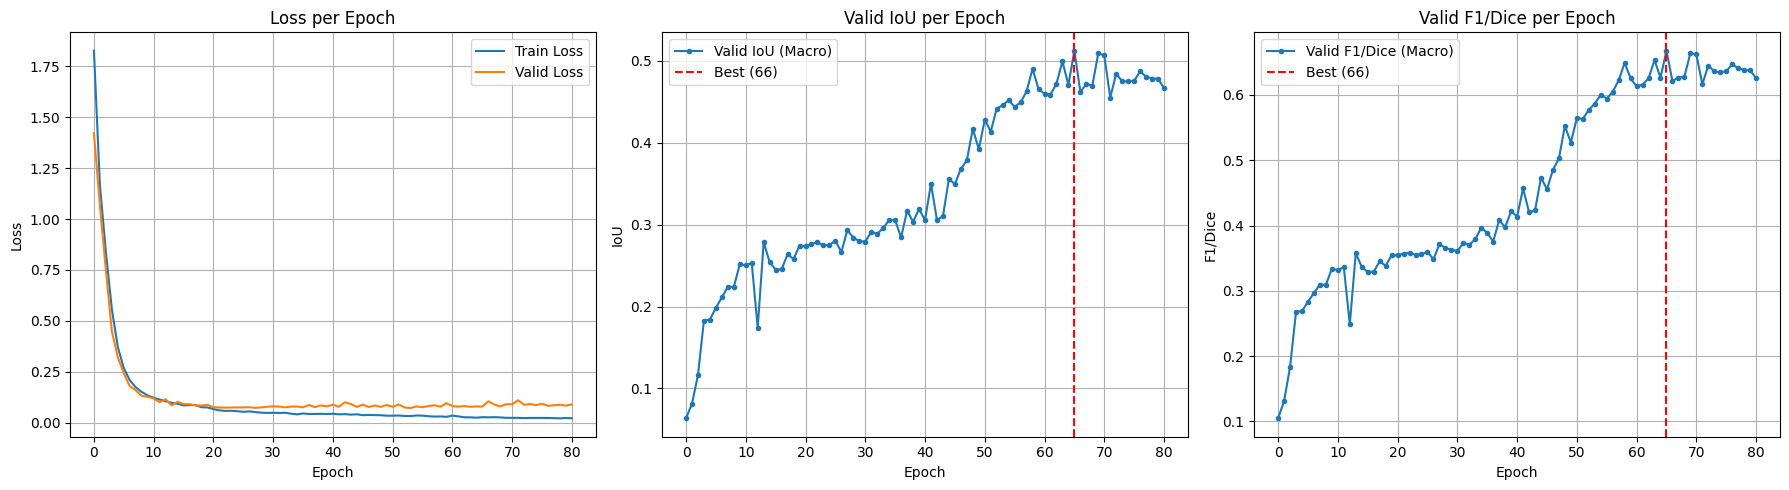


--- Resumen del Mejor Modelo (Época 66) ---
  Train Loss : 0.0272
  Valid Loss : 0.0793
  Valid IoU  : 0.5125
  Valid F1   : 0.6677
  Modelo guardado: /content/drive/MyDrive/Colab Notebooks/modelos_guardados/unet_resnet34_task2_best_epoch_v1.pth
------------------------------

Celda de Entrenamiento Finalizada.


In [ ]:

# 6. Bucle de Entrenamiento y Validación

from tqdm import tqdm
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau
import pandas as pd # Para tabla resumen final
import time # Para cálculo de tiempo total


#  Acumuladores Manuales para Validación (en CPU)
unet_intersections = torch.zeros(num_classes, dtype=torch.float64, device='cpu')
unet_pred_sums = torch.zeros(num_classes, dtype=torch.float64, device='cpu')
unet_gt_sums = torch.zeros(num_classes, dtype=torch.float64, device='cpu')
unet_unions = torch.zeros(num_classes, dtype=torch.float64, device='cpu') # Para IoU

# --- Variables Early Stopping y Mejor Modelo ---
if METRIC_TO_MONITOR == 'valid_loss':
    best_metric_value = float('inf') # Queremos minimizar la loss
    comparison_mode = 'min'
else:
    best_metric_value = -float('inf') # Queremos maximizar IoU o F1
    comparison_mode = 'max'

epochs_without_improvement = 0
best_epoch = -1

# Historial
history = {'train_loss': [], 'valid_loss': [], 'valid_iou': [], 'valid_f1': []}


print("Iniciando entrenamiento con Early Stopping y Métricas Manuales...")
print(f"Monitorizando: {METRIC_TO_MONITOR} (modo: {comparison_mode})")
print(f"Paciencia: {EARLY_STOPPING_PATIENCE} épocas")
print(f"Guardando mejor modelo en: {full_model_save_path}")
print("-" * 30)

training_start_time = time.time() # Tiempo inicio entrenamiento

#  Bucle Principal
for epoch in range(NUM_EPOCHS): # NUM_EPOCHS es el máximo
    print(f"\n--- Epoch {epoch+1}/{NUM_EPOCHS} ---")
    epoch_start_time = time.time()

    # Fase de Entrenamiento
    model.train()
    train_loss_accum = 0.0
    train_loop = tqdm(train_loader, desc=f"Train Epoch {epoch+1}", leave=False)

    for batch_idx, (images, masks) in enumerate(train_loop):
        images = images.to(DEVICE)
        masks = masks.to(DEVICE, dtype=torch.long)
        if masks.ndim == 4 and masks.shape[1] == 1: masks = masks.squeeze(1) # [B, H, W]

        optimizer.zero_grad()
        outputs = model(images) # Logits [B, C, H, W]
        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()

        train_loss_accum += loss.item()
        if batch_idx % 50 == 0:
            train_loop.set_postfix(loss=f"{loss.item():.4f}")

    avg_train_loss = train_loss_accum / len(train_loader)
    history['train_loss'].append(avg_train_loss)
    print(f"Epoch {epoch+1} - Train Loss: {avg_train_loss:.4f}")

    # Fase de Validación
    model.eval()
    valid_loss_accum = 0.0
    # Resetear acumuladores manuales al inicio de cada época de validación
    unet_intersections.zero_()
    unet_pred_sums.zero_()
    unet_gt_sums.zero_()
    unet_unions.zero_()

    valid_loop = tqdm(valid_loader, desc=f"Valid Epoch {epoch+1}", leave=False)

    with torch.no_grad():
        for batch_idx_val, (images, masks) in enumerate(valid_loop):
            images = images.to(DEVICE)
            masks_device = masks.to(DEVICE, dtype=torch.long)
            if masks_device.ndim == 4 and masks_device.shape[1] == 1: masks_device = masks_device.squeeze(1)

            outputs = model(images) # Logits [B, C, H, W]

            # Calcular Loss de validación
            valid_loss = loss_fn(outputs, masks_device)
            valid_loss_accum += valid_loss.item()

            # --- Acumular para Métricas Manuales ---
            preds_device = torch.argmax(outputs, dim=1) # [B, H, W]
            # Mover a CPU para acumular
            preds_cpu = preds_device.cpu().long()
            masks_cpu = masks_device.cpu().long()


            for i in range(preds_cpu.size(0)): # Iterar por si BATCH_SIZE > 1
                pred = preds_cpu[i]; gt = masks_cpu[i]
                for c_id in range(1, num_classes): # Ignorar fondo 0
                    pred_is_class = (pred == c_id); gt_is_class = (gt == c_id)
                    intersection = torch.logical_and(pred_is_class, gt_is_class).sum().float()
                    pred_sum = pred_is_class.sum().float(); gt_sum = gt_is_class.sum().float()
                    union = pred_sum + gt_sum - intersection
                    unet_intersections[c_id] += intersection
                    unet_pred_sums[c_id] += pred_sum
                    unet_gt_sums[c_id] += gt_sum
                    unet_unions[c_id] += union

    avg_valid_loss = valid_loss_accum / len(valid_loader)
    history['valid_loss'].append(avg_valid_loss)

    # --- Calcular métricas manuales finales para la época ---
    epsilon = 1e-6
    epoch_iou_per_class = (unet_intersections[1:] + epsilon) / (unet_unions[1:] + epsilon) # Clases 1 a N-1
    epoch_f1_per_class = (2. * unet_intersections[1:] + epsilon) / (unet_pred_sums[1:] + unet_gt_sums[1:] + epsilon) # Clases 1 a N-1
    epoch_iou_per_class = torch.nan_to_num(epoch_iou_per_class, nan=0.0)
    epoch_f1_per_class = torch.nan_to_num(epoch_f1_per_class, nan=0.0)
    epoch_macro_iou = torch.mean(epoch_iou_per_class).item() if len(epoch_iou_per_class) > 0 else 0.0
    epoch_macro_f1 = torch.mean(epoch_f1_per_class).item() if len(epoch_f1_per_class) > 0 else 0.0
    history['valid_iou'].append(epoch_macro_iou)
    history['valid_f1'].append(epoch_macro_f1)
    # -----------------------------------------------------

    print(f"Epoch {epoch+1} - Valid Loss: {avg_valid_loss:.4f}, Valid IoU: {epoch_macro_iou:.4f}, Valid F1/Dice: {epoch_macro_f1:.4f}")

    # --- Lógica de Early Stopping y Guardado ---
    # Determinar métrica actual a monitorizar
    if METRIC_TO_MONITOR == 'valid_iou': current_metric_value = epoch_macro_iou
    elif METRIC_TO_MONITOR == 'valid_f1': current_metric_value = epoch_macro_f1
    elif METRIC_TO_MONITOR == 'valid_loss': current_metric_value = avg_valid_loss
    else: current_metric_value = epoch_macro_iou

    # Comparar y guardar/actualizar contadores
    improved = False
    if (comparison_mode == 'max' and current_metric_value > best_metric_value) or \
       (comparison_mode == 'min' and current_metric_value < best_metric_value):
        print(f"  >> {METRIC_TO_MONITOR} mejorado ({best_metric_value:.4f} -> {current_metric_value:.4f}). Guardando modelo...")
        try:
             torch.save(model.state_dict(), full_model_save_path) # Guardar en ruta completa
             best_metric_value = current_metric_value
             best_epoch = epoch + 1
             epochs_without_improvement = 0
             improved = True
        except Exception as save_err:
             print(f"  >> ¡ERROR AL GUARDAR MODELO!: {save_err}")

    if not improved:
        epochs_without_improvement += 1
        print(f"  >> {METRIC_TO_MONITOR} no mejoró. Paciencia: {epochs_without_improvement}/{EARLY_STOPPING_PATIENCE}")

    # --- Paso del Scheduler ---
    # ReduceLROnPlateau espera la métrica monitorizada para decidir si bajar LR
    scheduler.step(current_metric_value)
    # Imprimir LR actual para ver si cambia
    print(f"  LR actual: {optimizer.param_groups[0]['lr']:.6f}")
    # -------------------------

    # Comprobar Early Stopping
    if epochs_without_improvement >= EARLY_STOPPING_PATIENCE:
        print(f"\n¡Early Stopping! {METRIC_TO_MONITOR} no ha mejorado en {EARLY_STOPPING_PATIENCE} épocas.")
        print(f"El mejor resultado fue {best_metric_value:.4f} en la época {best_epoch}.")
        break # Salir del bucle for de épocas

    #  Tiempo por Época
    epoch_end_time = time.time()
    print(f"  Tiempo Época: {(epoch_end_time - epoch_start_time):.2f} seg")


# --- Fin del Entrenamiento ---
training_end_time = time.time()
total_training_time = training_end_time - training_start_time
print(f"\nEntrenamiento finalizado después de {epoch+1} épocas.")
print(f"Tiempo total de entrenamiento: {total_training_time:.2f} seg ({total_training_time/60:.2f} min)")

if best_epoch != -1:
     print(f"Mejor modelo guardado en '{full_model_save_path}' (Época {best_epoch}, {METRIC_TO_MONITOR}: {best_metric_value:.4f})")
else:
     print("El modelo no mejoró durante el entrenamiento, no se guardó ningún checkpoint 'mejor'.")


# Cargar el mejor modelo guardado para uso inmediato
# Esto asegura que la variable 'model' contiene los mejores pesos al salir de esta celda
if os.path.exists(full_model_save_path) and best_epoch != -1:
    print(f"\nCargando el mejor modelo de la época {best_epoch}...")
    try:
        model.load_state_dict(torch.load(full_model_save_path, map_location=DEVICE))
        model.eval() # Poner en modo eval después de cargar
        print("Mejor modelo cargado correctamente en la variable 'model'.")
    except Exception as e:
        print(f"Error cargando el mejor modelo guardado: {e}")
else:
    print("\nNo se encontró o no se guardó un mejor modelo.")


# Graficar historial
print("\nGenerando gráficas de historial...")
plt.figure(figsize=(18, 5)) # Ajustar tamaño

# Gráfico de Loss
plt.subplot(1, 3, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['valid_loss'], label='Valid Loss')
plt.title('Loss per Epoch'); plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend(); plt.grid(True)

# Gráfico de IoU
plt.subplot(1, 3, 2)
plt.plot(history['valid_iou'], label='Valid IoU (Macro)', marker='.') # Puntos más pequeños
plt.title('Valid IoU per Epoch'); plt.xlabel('Epoch'); plt.ylabel('IoU')
if best_epoch != -1: plt.axvline(x=best_epoch-1, color='r', linestyle='--', label=f'Best ({best_epoch})')
plt.legend(); plt.grid(True)

# Gráfico de F1/Dice
plt.subplot(1, 3, 3)
plt.plot(history['valid_f1'], label='Valid F1/Dice (Macro)', marker='.') # Puntos más pequeños
plt.title('Valid F1/Dice per Epoch'); plt.xlabel('Epoch'); plt.ylabel('F1/Dice')
if best_epoch != -1: plt.axvline(x=best_epoch-1, color='r', linestyle='--', label=f'Best ({best_epoch})')
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()

# Tabla Resumen Final de la Mejor Época
if best_epoch != -1:
     print("\n--- Resumen del Mejor Modelo (Época {}) ---".format(best_epoch))
     try:
         # Acceder al historial usando el índice correcto (best_epoch - 1)
         best_train_loss = history['train_loss'][best_epoch-1]
         best_valid_loss = history['valid_loss'][best_epoch-1]
         # El IoU/F1 ya son los 'best_metric_value'
         best_iou = history['valid_iou'][best_epoch-1]
         best_f1 = history['valid_f1'][best_epoch-1]
         print(f"  Train Loss : {best_train_loss:.4f}")
         print(f"  Valid Loss : {best_valid_loss:.4f}")
         print(f"  Valid IoU  : {best_iou:.4f}")
         print(f"  Valid F1   : {best_f1:.4f}")
         print(f"  Modelo guardado: {full_model_save_path}")
         print("-" * 30)
     except IndexError:
         print("Error al acceder al historial para la mejor época (¿índice fuera de rango?).")
     except Exception as e_summary:
         print(f"Error generando resumen: {e_summary}")

print("\nCelda de Entrenamiento Finalizada.")

# Configuración de la evaluación final (U-Net vs. SAM)
Este bloque prepara el entorno para evaluar tu modelo U-Net y comparar con SAM: fija rutas y nombres de checkpoints, define el tipo y checkpoint de SAM, ajusta parámetros de evaluación (batch size, workers), recalcula num_classes a partir del CLASS_MAPPING y muestra por pantalla un resumen para verificar que todo está bien antes de lanzar la evaluación.

In [ ]:
import torch
import os
import numpy as np
import cv2
import pandas as pd
import time
from tqdm import tqdm

BEST_MODEL_FILENAME = "unet_resnet34_task2_best_epoch_v1.pth"
UNET_MODEL_PATH_EVAL = os.path.join(MODEL_SAVE_PATH, BEST_MODEL_FILENAME)

# Configuración SAM
SAM_MODEL_TYPE = "vit_b"
SAM_CHECKPOINT_FILENAME = "sam_vit_b_01ec64.pth"
SAM_CHECKPOINT_PATH = SAM_CHECKPOINT_FILENAME

# Parámetros Evaluación
EVAL_BATCH_SIZE = 1
EVAL_NUM_WORKERS = 2
# Recalcular num_classes por si acaso
if 'CLASS_MAPPING' in locals():
     num_classes = len(CLASS_MAPPING) + 1
else:
     raise NameError("La variable CLASS_MAPPING no está definida.")

print("--- Configuración para Evaluación Final ---")
print(f"Dispositivo       : {DEVICE}")
print(f"Num Clases        : {num_classes}")
print(f"Modelo U-Net a Eval: {UNET_MODEL_PATH_EVAL}")
print(f"Datos Evaluación  : {VALID_IMG_DIR} (imágenes)")
print(f"                    {VALID_MASK_DIR} (máscaras)")
print(f"Batch Size Eval   : {EVAL_BATCH_SIZE}")
print(f"Modelo SAM        : {SAM_MODEL_TYPE}")
print(f"Checkpoint SAM    : {SAM_CHECKPOINT_PATH}")
print("-" * 30)

--- Configuración para Evaluación Final ---
Dispositivo       : cuda
Num Clases        : 5
Modelo U-Net a Eval: /content/drive/MyDrive/Colab Notebooks/modelos_guardados/unet_resnet34_task2_best_epoch_v1.pth
Datos Evaluación  : /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/val/img (imágenes)
                    /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/val/masks (máscaras)
Batch Size Eval   : 1
Modelo SAM        : vit_b
Checkpoint SAM    : sam_vit_b_01ec64.pth
------------------------------


In [ ]:
import segmentation_models_pytorch as smp

# Instanciar Arquitectura U-Net
print(f"Instanciando arquitectura U-Net: Backbone={BACKBONE}, Num Clases={num_classes}")
unet_model_eval = smp.Unet(
    encoder_name=BACKBONE,
    encoder_weights="imagenet",
    in_channels=3,
    classes=num_classes
)
unet_model_eval.to(DEVICE)
print("Arquitectura U-Net creada y movida a DEVICE.")

Instanciando arquitectura U-Net: Backbone=resnet34, Num Clases=5
Arquitectura U-Net creada y movida a DEVICE.


In [ ]:
# --- Cargar Pesos del Mejor Modelo U-Net ---
print(f"Intentando cargar pesos desde: {UNET_MODEL_PATH_EVAL}")

if not os.path.exists(UNET_MODEL_PATH_EVAL):
    raise FileNotFoundError(f"¡ERROR CRÍTICO! No se encontró el archivo del mejor modelo U-Net en: {UNET_MODEL_PATH_EVAL}")

try:
    unet_model_eval.load_state_dict(torch.load(UNET_MODEL_PATH_EVAL, map_location=DEVICE))
    unet_model_eval.eval() # Poner en modo evaluación
    print("¡Pesos del mejor modelo U-Net cargados y modelo en modo eval!")
except Exception as e:
    print(f"ERROR crítico al cargar los pesos (load_state_dict): {e}")
    print("Verifica que la arquitectura instanciada coincida y que el archivo no esté corrupto.")
    raise e

Intentando cargar pesos desde: /content/drive/MyDrive/Colab Notebooks/modelos_guardados/unet_resnet34_task2_best_epoch_v1.pth
¡Pesos del mejor modelo U-Net cargados y modelo en modo eval!


# Dataset y DataLoader de evaluación
Este bloque construye el conjunto de evaluación a partir de las imágenes y máscaras de validación (porque no hay test) usando PcbDataset, y crea un DataLoader para iterarlo sin barajar, con los parámetros de batch y workers fijados. Se desactiva el augmentation y se mantiene el mismo preprocesado que en entrenamiento/validación. Todo va dentro de un try/except para capturar errores tempranos de rutas o configuración.

In [ ]:
from torch.utils.data import DataLoader

# Crear Dataset y DataLoader para Evaluación
# Usamos los datos de validación para evaluar, ya que no hay test set
# Se necesita PcbDataset, VALID_IMG_DIR, VALID_MASK_DIR, CLASS_MAPPING, preprocessing definidos antes

print("Creando Dataset de Evaluación (usando datos de validación)...")
try:
    eval_dataset = PcbDataset(
        image_dir=VALID_IMG_DIR,
        mask_dir=VALID_MASK_DIR,
        class_mapping=CLASS_MAPPING,
        augmentation=None,
        preprocessing=preprocessing # Usa el mismo preprocesamiento que en validación/entrenamiento
    )
    print(f"-> Dataset de Evaluación creado con {len(eval_dataset)} muestras.")

    eval_loader = DataLoader(
        dataset=eval_dataset,
        batch_size=EVAL_BATCH_SIZE,
        shuffle=False,
        num_workers=EVAL_NUM_WORKERS,
        pin_memory=False
    )
    print(f"-> DataLoader de Evaluación ('eval_loader') creado con {len(eval_loader)} lotes.")

except Exception as e:
    print(f"Error creando Dataset/DataLoader de Evaluación: {e}")
    raise e

Creando Dataset de Evaluación (usando datos de validación)...
Inicializando Dataset...
Directorio de imágenes: /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/val/img
Directorio de máscaras: /content/drive/MyDrive/Colab Notebooks/SolDef_AI_Organized_80_20/val/masks
Dataset inicializado con 86 muestras emparejadas.
-> Dataset de Evaluación creado con 86 muestras.
-> DataLoader de Evaluación ('eval_loader') creado con 86 lotes.


# Evaluación final de U-Net: métricas manuales (IoU/F1) y tiempos

El bloque pone el modelo en modo evaluación, recorre el eval_loader, obtiene predicciones de U-Net, y acumula por clase (ignorando el fondo=0) las cantidades necesarias para calcular IoU e F1/Dice de forma manual. Al final imprime:

IoU y F1 macro (media sobre clases),una tabla por clasey tiempos: inferencia media por imagen y tiempo total de evaluación.

In [ ]:

# 7. EVALUACIÓN FINAL U-NET

# Imports Necesarios
import torch
import numpy as np
from tqdm import tqdm
import time
import pandas as pd
import os
import cv2


print("\nEvaluando U-Net Entrenado - Calculando IoU y F1/Dice MANUALMENTE")

#  Verificar si el modelo está en modo eval
if not hasattr(unet_model_eval, 'training') or unet_model_eval.training:
    print("[ADVERTENCIA] El modelo U-Net no parece estar en modo evaluación (.eval()). Llamando a unet_model_eval.eval().")
    unet_model_eval.eval()
else:
    print("Modelo confirmado en modo .eval().")
# ---------------------------------------------

# Inicialización de Acumuladores Manuales para U-Net (en CPU)
unet_intersections = torch.zeros(num_classes, dtype=torch.float64, device='cpu')
unet_pred_sums = torch.zeros(num_classes, dtype=torch.float64, device='cpu')
unet_gt_sums = torch.zeros(num_classes, dtype=torch.float64, device='cpu')
unet_unions = torch.zeros(num_classes, dtype=torch.float64, device='cpu') # Para IoU
# -------------------------------------------------------------------

# Para medir tiempo
unet_start_time_total = time.time()
unet_inference_time_total = 0
unet_image_count = 0
# -------------------------

print("Acumuladores Manuales para U-Net inicializados en CPU.")
print(f"Iniciando evaluación sobre {len(eval_loader)} lotes...")

# Bucle Principal de Evaluación U-Net
with torch.no_grad(): # No calcular gradientes durante la evaluación
    for batch_idx, batch_data in enumerate(tqdm(eval_loader, desc="U-Net Eval")):
        try: # Añadir try/except general por lote por si hay error de carga
            images_batch, masks_batch = batch_data

            # Mover datos de entrada al dispositivo de inferencia (GPU/cuda)
            images_batch = images_batch.to(DEVICE)
            masks_batch_device = masks_batch.to(DEVICE).long() # Ground Truth en GPU

            # Timing: Inicio Inferencia
            start_time_inference = time.time()

            # 1. Obtener Predicción de U-Net
            output_unet = unet_model_eval(images_batch) # Salida [B, num_classes, H, W]
            pred_unet = torch.argmax(output_unet, dim=1) # [B, H, W] en DEVICE

            # Timing: Fin Inferencia
            end_time_inference = time.time()
            unet_inference_time_total += (end_time_inference - start_time_inference)
            unet_image_count += images_batch.size(0)

            # 2. Actualizar Acumuladores Manuales
            preds_cpu = pred_unet.cpu().long() # [B, H, W] long CPU
            masks_cpu = masks_batch_device.cpu().long() # [B, H, W] long CPU

            for i in range(preds_cpu.size(0)): # Iterar por lote (aunque BATCH_SIZE=1)
                pred = preds_cpu[i]; gt = masks_cpu[i]
                for c_id in range(1, num_classes): # Ignorar fondo 0
                    pred_is_class = (pred == c_id); gt_is_class = (gt == c_id)
                    intersection = torch.logical_and(pred_is_class, gt_is_class).sum().float()
                    pred_sum = pred_is_class.sum().float(); gt_sum = gt_is_class.sum().float()
                    union = pred_sum + gt_sum - intersection
                    unet_intersections[c_id] += intersection
                    unet_pred_sums[c_id] += pred_sum
                    unet_gt_sums[c_id] += gt_sum
                    unet_unions[c_id] += union

        except Exception as batch_err:
            print(f"\n[ERROR] Procesando lote {batch_idx}: {batch_err}")

# --- Fin del Bucle Principal ---
unet_end_time_total = time.time()
if unet_image_count > 0:
    print(f"\nBucle de evaluación U-Net completado. {unet_image_count} imágenes procesadas.")
else:
    print("\n¡ERROR! No se procesaron imágenes en la evaluación de U-Net.")


# Calcular y mostrar los resultados
epsilon = 1e-6
if unet_image_count > 0: # Solo calcular si se procesaron imágenes
    iou_per_class_unet = (unet_intersections[1:].float() + epsilon) / (unet_unions[1:].float() + epsilon)
    dice_f1_per_class_unet = (2. * unet_intersections[1:].float() + epsilon) / (unet_pred_sums[1:].float() + unet_gt_sums[1:].float() + epsilon)
    iou_per_class_unet = torch.nan_to_num(iou_per_class_unet, nan=0.0)
    dice_f1_per_class_unet = torch.nan_to_num(dice_f1_per_class_unet, nan=0.0)

    if len(iou_per_class_unet) > 0: macro_iou_unet = torch.mean(iou_per_class_unet).item()
    else: macro_iou_unet = 0.0
    if len(dice_f1_per_class_unet) > 0: macro_dice_f1_unet = torch.mean(dice_f1_per_class_unet).item()
    else: macro_dice_f1_unet = 0.0
else: # Poner scores a cero si no hubo imágenes
     macro_iou_unet = 0.0; macro_dice_f1_unet = 0.0
     iou_per_class_unet = torch.zeros(num_classes-1) # Tensor de ceros
     dice_f1_per_class_unet = torch.zeros(num_classes-1)


#Imprimir Resultados U-Net
print("\n--- Resultados U-Net (Cálculo Manual) ---")
print(f"IoU (Macro)        : {macro_iou_unet:.4f}")
print(f"F1/Dice (Macro)    : {macro_dice_f1_unet:.4f}")

# --- Mostrar Métricas por Clase U-Net usando Pandas ---
print("\n--- Métricas por Clase U-Net (Manual) ---")
if 'inv_class_mapping' not in locals():
     try: inv_class_mapping = {v: k for k, v in CLASS_MAPPING.items()}
     except NameError: inv_class_mapping = {}
results_list_unet = []
iou_values_unet = iou_per_class_unet.cpu().numpy()
f1_values_unet = dice_f1_per_class_unet.cpu().numpy()
if len(iou_values_unet) == num_classes -1: # Comprobar longitud
    for i in range(len(iou_values_unet)):
        class_id = i + 1; class_name = inv_class_mapping.get(class_id, f"ID:{class_id}")
        iou_val = iou_values_unet[i]; f1_val = f1_values_unet[i]
        results_list_unet.append({'Class ID': class_id, 'Class Name': class_name, 'IoU': f'{iou_val:.4f}', 'F1/Dice': f'{f1_val:.4f}'})
else:
     print(f"[WARN] Longitud inesperada para scores por clase: {len(iou_values_unet)}. Esperada: {num_classes-1}")

if results_list_unet:
    df_results_per_class_unet = pd.DataFrame(results_list_unet)
    pd.set_option('display.max_rows', None); pd.set_option('display.max_columns', None); pd.set_option('display.width', 1000)
    print(df_results_per_class_unet.to_string(index=False))
else: print("No se generaron resultados por clase para U-Net.")

# Guardar scores finales U-Net
unet_iou_score = macro_iou_unet
unet_f1_score = macro_dice_f1_unet

# Tiempo U-Net
print("\n--- Tiempos de Ejecución U-Net ---")
if unet_image_count > 0:
    unet_avg_inference_time = unet_inference_time_total / unet_image_count
    print(f"Tiempo de INFERENCIA promedio U-Net (solo forward pass): {unet_avg_inference_time * 1000:.2f} ms por imagen")
    unet_total_eval_time = unet_end_time_total - unet_start_time_total
    print(f"Tiempo TOTAL evaluación U-Net (incl. carga datos, métricas, etc.): {unet_total_eval_time:.2f} seg")
else: print("\nNo se procesaron imágenes para calcular tiempos de U-Net.")

print("-" * 40)
print("Evaluación U-Net (Manual) finalizada.")
print("-" * 40)



Evaluando U-Net Entrenado - Calculando IoU y F1/Dice MANUALMENTE
Modelo confirmado en modo .eval().
Acumuladores Manuales para U-Net inicializados en CPU.
Iniciando evaluación sobre 86 lotes...


U-Net Eval: 100%|██████████| 86/86 [00:04<00:00, 18.86it/s]



Bucle de evaluación U-Net completado. 86 imágenes procesadas.

--- Resultados U-Net (Cálculo Manual) ---
IoU (Macro)        : 0.5125
F1/Dice (Macro)    : 0.6677

--- Métricas por Clase U-Net (Manual) ---
 Class ID  Class Name    IoU F1/Dice
        1        good 0.5934  0.7448
        2  exc_solder 0.6534  0.7904
        3 poor_solder 0.3163  0.4806
        4       spike 0.4871  0.6551

--- Tiempos de Ejecución U-Net ---
Tiempo de INFERENCIA promedio U-Net (solo forward pass): 20.12 ms por imagen
Tiempo TOTAL evaluación U-Net (incl. carga datos, métricas, etc.): 4.76 seg
----------------------------------------
Evaluación U-Net (Manual) finalizada.
----------------------------------------


El bloque asegura que existe el checkpoint de SAM (lo descarga si falta), instancia el modelo SAM de tipo vit_b, lo mueve al dispositivo disponible (GPU si es posible, si no CPU), lo pone en modo evaluación, y crea el SamPredictor. Si hay un error al cargar en GPU, reintenta automáticamente en CPU.

In [ ]:
from segment_anything import sam_model_registry, SamPredictor
# Ahora carga SAM

SAM_LOAD_DEVICE = DEVICE # Intenta GPU primero
print(f"Intentando cargar SAM en: {SAM_LOAD_DEVICE}")

# --- Código para verificar y cargar SAM ---
try:
    print(f"DEBUG: Verificando existencia de: {SAM_CHECKPOINT_PATH}") # Imprime la ruta

    if not os.path.exists(SAM_CHECKPOINT_PATH):
        print(f"Checkpoint {SAM_CHECKPOINT_PATH} no encontrado. Descargando...")
        # Comando wget con la opción -O para guardar en la ruta/nombre especificado
        !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O {SAM_CHECKPOINT_PATH}
        print("Comando Wget ejecutado.")

        print("Verificando archivos en /content/ después de wget:")
        !ls -lh /content/

        # Opcional: pequeña pausa por si el sistema de archivos tarda en actualizarse
        import time
        time.sleep(2)

        # Comprobar de nuevo si existe después de intentar descargar
        if not os.path.exists(SAM_CHECKPOINT_PATH):
             print(f"¡ERROR! El archivo {SAM_CHECKPOINT_PATH} SIGUE SIN EXISTIR después de intentar descargarlo.")
             raise FileNotFoundError(f"Fallo en la descarga o guardado de {SAM_CHECKPOINT_PATH}")
        else:
             print(f"Archivo {SAM_CHECKPOINT_PATH} encontrado después de la descarga.")


    print(f"Cargando modelo SAM ({SAM_MODEL_TYPE}) desde {SAM_CHECKPOINT_PATH} al dispositivo {SAM_LOAD_DEVICE}...")
    sam_model = sam_model_registry[SAM_MODEL_TYPE](checkpoint=SAM_CHECKPOINT_PATH)
    sam_model.to(device=SAM_LOAD_DEVICE)
    sam_model.eval() # Poner SAM en modo evaluación

    # Crear el predictor de SAM
    sam_predictor = SamPredictor(sam_model)
    print(f"Modelo SAM cargado en {SAM_LOAD_DEVICE} y predictor creado exitosamente.")

except Exception as e:
    print(f"¡ERROR al cargar SAM en {SAM_LOAD_DEVICE}!: {e}")
    if SAM_LOAD_DEVICE == 'cuda':
        print("-> Hubo un error cargando SAM en la GPU.")
        print("-> Intentando cargar SAM en la CPU como alternativa...")
        SAM_LOAD_DEVICE = 'cpu' # Cambia al dispositivo CPU
        try:
            # Reintentar la carga en CPU
            if 'sam_model' in locals(): del sam_model
            if torch.cuda.is_available(): torch.cuda.empty_cache()

            print(f"DEBUG: Re-verificando existencia de: {SAM_CHECKPOINT_PATH} antes de cargar en CPU")
            if not os.path.exists(SAM_CHECKPOINT_PATH):
                 raise FileNotFoundError(f"El archivo {SAM_CHECKPOINT_PATH} no existe tampoco para la carga en CPU.")
            # ------------------------------------

            print(f"Cargando modelo SAM ({SAM_MODEL_TYPE}) desde {SAM_CHECKPOINT_PATH} al dispositivo {SAM_LOAD_DEVICE}...")
            sam_model = sam_model_registry[SAM_MODEL_TYPE](checkpoint=SAM_CHECKPOINT_PATH) # Usa la variable de ruta
            sam_model.to(device=SAM_LOAD_DEVICE)
            sam_model.eval()
            sam_predictor = SamPredictor(sam_model)
            print("¡Éxito! Modelo SAM cargado en la CPU y predictor creado.")
        except Exception as e2:
            print(f"¡ERROR! Falló también la carga de SAM en la CPU: {e2}")
            raise e2
    else:
         raise e

Intentando cargar SAM en: cuda
DEBUG: Verificando existencia de: sam_vit_b_01ec64.pth
Cargando modelo SAM (vit_b) desde sam_vit_b_01ec64.pth al dispositivo cuda...
Modelo SAM cargado en cuda y predictor creado exitosamente.


In [ ]:
import os
import torch

sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"
sam_load_device = DEVICE # Intentar usar el mismo dispositivo (ej. 'cuda')

# --- Añadido: Comprobar/Descargar Checkpoint ---
if not os.path.exists(sam_checkpoint):
    print(f"Checkpoint {sam_checkpoint} no encontrado. Descargando...")
    # Asegúrate que la URL es correcta para vit_b y que el nombre guardado coincida
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O {sam_checkpoint}
    print("Descarga completa.")
# ---------------------------------------------

try:
    print(f"Cargando modelo SAM ({model_type}) al dispositivo {sam_load_device}...")
    sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
    sam.to(device=sam_load_device)
    sam.eval() # <-- Añadido: Poner en modo evaluación
    predictor = SamPredictor(sam)
    print(f"Modelo SAM (ViT-B) cargado en {sam_load_device} y predictor listo.")

except Exception as e:
    print(f"Error cargando SAM en {sam_load_device}: {e}")
    if sam_load_device == 'cuda':
         print("-> Falló la carga en GPU. ¿Memoria insuficiente?")
         # Podrías añadir aquí el intento de carga en CPU como fallback si quieres
         print("-> Si el error persiste, considera cargar en CPU ('cpu').")
    raise e # Relanzar el error para detener si falla

# 'predictor' está listo para usar

Cargando modelo SAM (vit_b) al dispositivo cuda...
Modelo SAM (ViT-B) cargado en cuda y predictor listo.


La función recibe una máscara multiclase (cada píxel tiene un class_id) y devuelve una lista de cajas delimitadoras ([xmin, ymin, xmax, ymax]) para cada instancia conectada de cada clase (ignorando el fondo 0). Para detectar las instancias usa componentes conectados y, a partir de cada componente, calcula su bbox.

In [ ]:
def get_bboxes_from_mask(mask_gt, class_mapping):
    """Extrae bboxes y class_ids de una máscara multiclase ground truth."""
    bboxes = [] # Lista para guardar (bbox_coords, class_id)
    unique_classes = np.unique(mask_gt)
    for class_id in unique_classes:
        if class_id == 0: # Ignorar fondo
            continue

        # Crear máscara binaria para la clase actual
        class_mask = (mask_gt == class_id).astype(np.uint8)

        # Encontrar componentes conectados (instancias separadas de la misma clase)
        num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(class_mask, connectivity=8)

        # Iterar sobre cada componente/instancia (ignorar etiqueta 0 - fondo de la componente)
        for label_id in range(1, num_labels):
            x = stats[label_id, cv2.CC_STAT_LEFT]
            y = stats[label_id, cv2.CC_STAT_TOP]
            w = stats[label_id, cv2.CC_STAT_WIDTH]
            h = stats[label_id, cv2.CC_STAT_HEIGHT]
            # Formato de bbox para SAM: [xmin, ymin, xmax, ymax]
            bbox_coords = np.array([x, y, x + w, y + h])
            bboxes.append((bbox_coords, class_id))

    return bboxes

In [ ]:
!pip install pandas

# Evaluación de SAM (zero-shot con cajas desde la GT)

Este bloque evalúa SAM en modo zero-shot usando prompts de bounding boxes extraídos de la máscara ground truth. Para cada imagen:
se reconstruye la imagen en formato uint8 (RGB) a partir del tensor normalizado,
se obtienen las cajas por clase desde la GT,
se llama a predictor.set_image(...) y luego a predictor.predict(box=...) por cada caja,
se ensambla una máscara multiclase con las predicciones de SAM,
se acumulan métricas manuales por clase (IoU y F1/Dice, ignorando el fondo),
se miden tiempos (inferencia media y total) y se imprime un resumen por clase.

In [ ]:
# Imports Necesarios
import torch
import cv2
import numpy as np
from tqdm import tqdm
import time
import os
import pandas as pd


print("\nEvaluando SAM (Zero-Shot con BBox Prompts) - Calculando IoU y F1/Dice MANUALMENTE")



# Inicialización de Acumuladores Manuales (en CPU)
sam_intersections = torch.zeros(num_classes, dtype=torch.float32)
sam_pred_sums = torch.zeros(num_classes, dtype=torch.float32)
sam_gt_sums = torch.zeros(num_classes, dtype=torch.float32)
sam_unions = torch.zeros(num_classes, dtype=torch.float32) # Para IoU

# Para medir tiempo e índice
sam_start_time_total = time.time()
sam_inference_time_total = 0
sam_image_count = 0

print("Acumuladores Manuales para IoU y Dice/F1 inicializados en CPU.")
print(f"Iniciando evaluación sobre {len(eval_loader)} lotes...")

# Bucle Principal de Evaluación SAM
with torch.no_grad():
    for batch_idx, batch_data in enumerate(tqdm(eval_loader, desc="SAM Eval")):
        images_batch, masks_batch = batch_data
        # Asumimos BATCH_SIZE = 1
        if images_batch.size(0) != 1: continue # Simplificación
        image_tensor = images_batch[0]
        mask_gt_tensor = masks_batch[0]

        start_time_image_inference = time.time()

        # 1. Preparar datos para SAM Predictor (NumPy)
        image_np_rgb = image_tensor.cpu().numpy().transpose(1, 2, 0)
        mean = np.array([0.485, 0.456, 0.406]); std = np.array([0.229, 0.224, 0.225])
        image_np_rgb = (std * image_np_rgb + mean)
        image_np_rgb = np.clip(image_np_rgb * 255, 0, 255).astype(np.uint8)
        image_np_bgr = cv2.cvtColor(image_np_rgb, cv2.COLOR_RGB2BGR)
        mask_gt_np = mask_gt_tensor.cpu().numpy().astype(np.uint8)
        if mask_gt_np.ndim == 3 and mask_gt_np.shape[0] == 1: mask_gt_np = mask_gt_np.squeeze(0)

        # Verificar Máscara GT y Prompts
        print(f"\nDEBUG Lote {batch_idx}: Clases únicas en GT NumPy = {np.unique(mask_gt_np)}")
        try:
            bboxes_info = get_bboxes_from_mask(mask_gt_np, CLASS_MAPPING)
            print(f"DEBUG Lote {batch_idx}: BBoxes encontradas por get_bboxes_from_mask = {len(bboxes_info)}")
        except Exception as e_getbbox:
            print(f"DEBUG Lote {batch_idx}: ERROR en get_bboxes_from_mask: {e_getbbox}")
            bboxes_info = [] # Poner lista vacía para continuar si falla aquí

        # 2. Generar Predicción SAM Completa (Reconstruida NumPy)
        sam_final_pred_mask = np.zeros_like(mask_gt_np, dtype=np.uint8)
        try:
            # Solo intentar predicción si se encontraron bboxes
            if bboxes_info: # Evita llamar a set_image si no hay nada que buscar
                 predictor.set_image(image_np_bgr)

                 for bbox_coords, class_id in bboxes_info:
                     try:
                         if not (0 < class_id < num_classes): continue
                         masks_sam, scores, logits_sam = predictor.predict(
                             box=bbox_coords, multimask_output=False
                         )
                         predicted_mask_bool = masks_sam[0] # NumPy bool [H, W]
                         sam_final_pred_mask[predicted_mask_bool] = class_id # Operación NumPy
                     except Exception as predict_err:
                         continue

        except Exception as sam_pred_err:
             continue


        end_time_image_inference = time.time()
        sam_inference_time_total += (end_time_image_inference - start_time_image_inference)
        sam_image_count += 1 l

        # 3. Actualizar Acumuladores Manuales
        sam_pred_tensor_cpu = torch.from_numpy(sam_final_pred_mask).long()
        mask_gt_tensor_cpu = torch.from_numpy(mask_gt_np).long()
        pred = sam_pred_tensor_cpu; gt = mask_gt_tensor_cpu
        for c_id in range(1, num_classes):
            pred_is_class = (pred == c_id); gt_is_class = (gt == c_id)
            intersection = torch.logical_and(pred_is_class, gt_is_class).sum().float()
            pred_sum = pred_is_class.sum().float(); gt_sum = gt_is_class.sum().float()
            union = pred_sum + gt_sum - intersection
            sam_intersections[c_id] += intersection
            sam_pred_sums[c_id] += pred_sum
            sam_gt_sums[c_id] += gt_sum
            sam_unions[c_id] += union

# Fin del Bucle Principal

sam_end_time_total = time.time()
print(f"\nBucle de evaluación SAM completado. {sam_image_count} imágenes procesadas.")

# Calcular y mostrar los resultados (Todo Manual)
epsilon = 1e-6 # Para evitar división por cero

# Calcular Métricas por Clase (clases 1 a num_classes-1)
iou_per_class_manual = (sam_intersections[1:] + epsilon) / (sam_unions[1:] + epsilon)
dice_f1_per_class_manual = (2. * sam_intersections[1:] + epsilon) / (sam_pred_sums[1:] + sam_gt_sums[1:] + epsilon)

# Convertir NaN a 0.0
iou_per_class_manual = torch.nan_to_num(iou_per_class_manual, nan=0.0)
dice_f1_per_class_manual = torch.nan_to_num(dice_f1_per_class_manual, nan=0.0)

# Calcular Métricas Macro
if len(iou_per_class_manual) > 0:
    macro_iou_sam = torch.mean(iou_per_class_manual).item()
else: macro_iou_sam = 0.0

if len(dice_f1_per_class_manual) > 0:
     macro_dice_f1_sam = torch.mean(dice_f1_per_class_manual).item()
else: macro_dice_f1_sam = 0.0

# --- Imprimir Resultados ---
print("\n--- Resultados SAM (Cálculo Manual) ---")
print(f"IoU (Macro)        : {macro_iou_sam:.4f}")
print(f"F1/Dice (Macro)    : {macro_dice_f1_sam:.4f}")

# Mostrar Métricas por Clase usando Pandas

print("\n--- Métricas por Clase (Manual) ---")
# Crear mapeo inverso si no existe ya
if 'inv_class_mapping' not in locals():
     try:
        inv_class_mapping = {v: k for k, v in CLASS_MAPPING.items()}
     except NameError:
        print("[WARN] CLASS_MAPPING no definido, se usarán solo IDs.")
        inv_class_mapping = {}

results_list = []
# Asegurarse de que los tensores estén en CPU y convertirlos a NumPy
iou_values = iou_per_class_manual.cpu().numpy()
f1_values = dice_f1_per_class_manual.cpu().numpy()

# Verificar longitud (debería ser num_classes - 1)
print(f"DEBUG: Longitud de scores por clase calculados: {len(iou_values)}")

for i in range(len(iou_values)): # i va de 0 a num_classes-2
    class_id = i + 1 # ID de clase real es 1 a num_classes-1
    class_name = inv_class_mapping.get(class_id, f"ID:{class_id}")
    iou_val = iou_values[i]
    f1_val = f1_values[i]
    results_list.append({
        'Class ID': class_id,
        'Class Name': class_name,
        'IoU': f'{iou_val:.4f}', # Formatear
        'F1/Dice': f'{f1_val:.4f}' # Formatear
    })

# Crear el DataFrame de Pandas
if results_list:
    df_results_per_class = pd.DataFrame(results_list)

    # Configurar Pandas para mostrar todas las filas/columnas
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000) # Ajustar ancho si es necesario

    print(df_results_per_class.to_string(index=False))

else:
    print("No se generaron resultados por clase para mostrar.")
# ----------------------------------------------------

# Guardar scores finales
sam_iou_score = macro_iou_sam
sam_f1_score = macro_dice_f1_sam

# Tiempo
print("\n--- Tiempos de Ejecución ---")
if sam_image_count > 0:
    sam_avg_inference_time = sam_inference_time_total / sam_image_count
    print(f"Tiempo de INFERENCIA promedio SAM (set_image+predict por imagen): {sam_avg_inference_time * 1000:.2f} ms")
    sam_total_eval_time = sam_end_time_total - sam_start_time_total
    print(f"Tiempo TOTAL evaluación SAM (incl. carga datos, métricas, etc.): {sam_total_eval_time:.2f} seg")
else:
    print("\nNo se procesaron imágenes para calcular tiempos.")

print("-" * 40)
print("Evaluación SAM (Manual) finalizada.")
print("-" * 40)


Evaluando SAM (Zero-Shot con BBox Prompts) - Calculando IoU y F1/Dice MANUALMENTE
Acumuladores Manuales para IoU y Dice/F1 inicializados en CPU.
Iniciando evaluación sobre 86 lotes...


SAM Eval:   1%|          | 1/86 [00:00<00:29,  2.91it/s]


DEBUG Lote 0: Clases únicas en GT NumPy = [0]
DEBUG Lote 0: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 1: Clases únicas en GT NumPy = [0]
DEBUG Lote 1: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 2: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 2: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:   3%|▎         | 3/86 [00:00<00:26,  3.16it/s]


DEBUG Lote 3: Clases únicas en GT NumPy = [0]
DEBUG Lote 3: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 4: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 4: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  10%|█         | 9/86 [00:01<00:11,  6.75it/s]


DEBUG Lote 5: Clases únicas en GT NumPy = [0]
DEBUG Lote 5: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 6: Clases únicas en GT NumPy = [0]
DEBUG Lote 6: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 7: Clases únicas en GT NumPy = [0]
DEBUG Lote 7: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 8: Clases únicas en GT NumPy = [0]
DEBUG Lote 8: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 9: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 9: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  13%|█▎        | 11/86 [00:02<00:13,  5.40it/s]


DEBUG Lote 10: Clases únicas en GT NumPy = [0]
DEBUG Lote 10: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 11: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 11: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  14%|█▍        | 12/86 [00:02<00:19,  3.83it/s]


DEBUG Lote 12: Clases únicas en GT NumPy = [0]
DEBUG Lote 12: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 13: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 13: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  16%|█▋        | 14/86 [00:03<00:19,  3.61it/s]


DEBUG Lote 14: Clases únicas en GT NumPy = [0]
DEBUG Lote 14: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 15: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 15: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  19%|█▊        | 16/86 [00:04<00:19,  3.58it/s]


DEBUG Lote 16: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 16: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  24%|██▍       | 21/86 [00:04<00:10,  5.92it/s]


DEBUG Lote 17: Clases únicas en GT NumPy = [0]
DEBUG Lote 17: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 18: Clases únicas en GT NumPy = [0]
DEBUG Lote 18: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 19: Clases únicas en GT NumPy = [0]
DEBUG Lote 19: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 20: Clases únicas en GT NumPy = [0]
DEBUG Lote 20: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 21: Clases únicas en GT NumPy = [0]
DEBUG Lote 21: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 22: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 22: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  27%|██▋       | 23/86 [00:05<00:12,  5.00it/s]


DEBUG Lote 23: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 23: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  29%|██▉       | 25/86 [00:05<00:13,  4.60it/s]


DEBUG Lote 24: Clases únicas en GT NumPy = [0]
DEBUG Lote 24: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 25: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 25: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  30%|███       | 26/86 [00:06<00:16,  3.71it/s]


DEBUG Lote 26: Clases únicas en GT NumPy = [0]
DEBUG Lote 26: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 27: Clases únicas en GT NumPy = [0]
DEBUG Lote 27: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 28: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 28: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  34%|███▎      | 29/86 [00:06<00:13,  4.31it/s]


DEBUG Lote 29: Clases únicas en GT NumPy = [0]
DEBUG Lote 29: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 30: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 30: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  36%|███▌      | 31/86 [00:07<00:13,  4.06it/s]


DEBUG Lote 31: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 31: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  37%|███▋      | 32/86 [00:07<00:15,  3.43it/s]


DEBUG Lote 32: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 32: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  38%|███▊      | 33/86 [00:08<00:17,  3.00it/s]


DEBUG Lote 33: Clases únicas en GT NumPy = [0]
DEBUG Lote 33: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 34: Clases únicas en GT NumPy = [0]
DEBUG Lote 34: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 35: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 35: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  47%|████▋     | 40/86 [00:09<00:07,  6.34it/s]


DEBUG Lote 36: Clases únicas en GT NumPy = [0]
DEBUG Lote 36: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 37: Clases únicas en GT NumPy = [0]
DEBUG Lote 37: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 38: Clases únicas en GT NumPy = [0]
DEBUG Lote 38: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 39: Clases únicas en GT NumPy = [0]
DEBUG Lote 39: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 40: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 40: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  49%|████▉     | 42/86 [00:09<00:08,  5.44it/s]


DEBUG Lote 41: Clases únicas en GT NumPy = [0]
DEBUG Lote 41: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 42: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 42: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  50%|█████     | 43/86 [00:10<00:10,  4.30it/s]


DEBUG Lote 43: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 43: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  51%|█████     | 44/86 [00:10<00:11,  3.53it/s]


DEBUG Lote 44: Clases únicas en GT NumPy = [0]
DEBUG Lote 44: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 45: Clases únicas en GT NumPy = [0]
DEBUG Lote 45: BBoxes encontradas por get_bboxes_from_mask = 0

DEBUG Lote 46: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 46: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  55%|█████▍    | 47/86 [00:11<00:09,  4.17it/s]


DEBUG Lote 47: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 47: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  56%|█████▌    | 48/86 [00:11<00:10,  3.55it/s]


DEBUG Lote 48: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 48: BBoxes encontradas por get_bboxes_from_mask = 1


SAM Eval:  57%|█████▋    | 49/86 [00:12<00:12,  3.03it/s]


DEBUG Lote 49: Clases únicas en GT NumPy = [0 1 4]
DEBUG Lote 49: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  58%|█████▊    | 50/86 [00:12<00:13,  2.69it/s]


DEBUG Lote 50: Clases únicas en GT NumPy = [0 2 3 4]
DEBUG Lote 50: BBoxes encontradas por get_bboxes_from_mask = 3


SAM Eval:  59%|█████▉    | 51/86 [00:13<00:14,  2.43it/s]


DEBUG Lote 51: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 51: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  60%|██████    | 52/86 [00:13<00:15,  2.27it/s]


DEBUG Lote 52: Clases únicas en GT NumPy = [0 2 3]
DEBUG Lote 52: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  62%|██████▏   | 53/86 [00:14<00:15,  2.16it/s]


DEBUG Lote 53: Clases únicas en GT NumPy = [0 1 2]
DEBUG Lote 53: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  63%|██████▎   | 54/86 [00:14<00:15,  2.02it/s]


DEBUG Lote 54: Clases únicas en GT NumPy = [0 2 3]
DEBUG Lote 54: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  64%|██████▍   | 55/86 [00:15<00:15,  1.97it/s]


DEBUG Lote 55: Clases únicas en GT NumPy = [0 2 3]
DEBUG Lote 55: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  65%|██████▌   | 56/86 [00:15<00:15,  1.93it/s]


DEBUG Lote 56: Clases únicas en GT NumPy = [0 2 4]
DEBUG Lote 56: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  66%|██████▋   | 57/86 [00:16<00:15,  1.89it/s]


DEBUG Lote 57: Clases únicas en GT NumPy = [0 2 4]
DEBUG Lote 57: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  67%|██████▋   | 58/86 [00:17<00:15,  1.86it/s]


DEBUG Lote 58: Clases únicas en GT NumPy = [0 2 4]
DEBUG Lote 58: BBoxes encontradas por get_bboxes_from_mask = 3


SAM Eval:  69%|██████▊   | 59/86 [00:17<00:14,  1.85it/s]


DEBUG Lote 59: Clases únicas en GT NumPy = [0 2 4]
DEBUG Lote 59: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  70%|██████▉   | 60/86 [00:18<00:13,  1.86it/s]


DEBUG Lote 60: Clases únicas en GT NumPy = [0 1 4]
DEBUG Lote 60: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  71%|███████   | 61/86 [00:18<00:13,  1.87it/s]


DEBUG Lote 61: Clases únicas en GT NumPy = [0 2 4]
DEBUG Lote 61: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  72%|███████▏  | 62/86 [00:19<00:12,  1.87it/s]


DEBUG Lote 62: Clases únicas en GT NumPy = [0 1 4]
DEBUG Lote 62: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  73%|███████▎  | 63/86 [00:19<00:12,  1.87it/s]


DEBUG Lote 63: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 63: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  74%|███████▍  | 64/86 [00:20<00:11,  1.88it/s]


DEBUG Lote 64: Clases únicas en GT NumPy = [0 1 4]
DEBUG Lote 64: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  76%|███████▌  | 65/86 [00:20<00:11,  1.87it/s]


DEBUG Lote 65: Clases únicas en GT NumPy = [0 3]
DEBUG Lote 65: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  77%|███████▋  | 66/86 [00:21<00:10,  1.87it/s]


DEBUG Lote 66: Clases únicas en GT NumPy = [0 3 4]
DEBUG Lote 66: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  78%|███████▊  | 67/86 [00:21<00:10,  1.87it/s]


DEBUG Lote 67: Clases únicas en GT NumPy = [0 2 3]
DEBUG Lote 67: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  79%|███████▉  | 68/86 [00:22<00:09,  1.87it/s]


DEBUG Lote 68: Clases únicas en GT NumPy = [0 2 4]
DEBUG Lote 68: BBoxes encontradas por get_bboxes_from_mask = 8


SAM Eval:  80%|████████  | 69/86 [00:23<00:09,  1.84it/s]


DEBUG Lote 69: Clases únicas en GT NumPy = [0 1 2]
DEBUG Lote 69: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  81%|████████▏ | 70/86 [00:23<00:08,  1.86it/s]


DEBUG Lote 70: Clases únicas en GT NumPy = [0 2]
DEBUG Lote 70: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  83%|████████▎ | 71/86 [00:24<00:08,  1.87it/s]


DEBUG Lote 71: Clases únicas en GT NumPy = [0 2 4]
DEBUG Lote 71: BBoxes encontradas por get_bboxes_from_mask = 7


SAM Eval:  84%|████████▎ | 72/86 [00:24<00:07,  1.85it/s]


DEBUG Lote 72: Clases únicas en GT NumPy = [0 1 2 4]
DEBUG Lote 72: BBoxes encontradas por get_bboxes_from_mask = 4


SAM Eval:  85%|████████▍ | 73/86 [00:25<00:07,  1.85it/s]


DEBUG Lote 73: Clases únicas en GT NumPy = [0 2 4]
DEBUG Lote 73: BBoxes encontradas por get_bboxes_from_mask = 3


SAM Eval:  86%|████████▌ | 74/86 [00:25<00:06,  1.85it/s]


DEBUG Lote 74: Clases únicas en GT NumPy = [0 2]
DEBUG Lote 74: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  87%|████████▋ | 75/86 [00:26<00:05,  1.87it/s]


DEBUG Lote 75: Clases únicas en GT NumPy = [0 2 3 4]
DEBUG Lote 75: BBoxes encontradas por get_bboxes_from_mask = 3


SAM Eval:  88%|████████▊ | 76/86 [00:26<00:05,  1.87it/s]


DEBUG Lote 76: Clases únicas en GT NumPy = [0 2]
DEBUG Lote 76: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  90%|████████▉ | 77/86 [00:27<00:04,  1.88it/s]


DEBUG Lote 77: Clases únicas en GT NumPy = [0 2 4]
DEBUG Lote 77: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  91%|█████████ | 78/86 [00:27<00:04,  1.88it/s]


DEBUG Lote 78: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 78: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  92%|█████████▏| 79/86 [00:28<00:03,  1.87it/s]


DEBUG Lote 79: Clases únicas en GT NumPy = [0 1 2]
DEBUG Lote 79: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  93%|█████████▎| 80/86 [00:28<00:03,  1.85it/s]


DEBUG Lote 80: Clases únicas en GT NumPy = [0 3 4]
DEBUG Lote 80: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  94%|█████████▍| 81/86 [00:29<00:02,  1.84it/s]


DEBUG Lote 81: Clases únicas en GT NumPy = [0 1]
DEBUG Lote 81: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  95%|█████████▌| 82/86 [00:30<00:02,  1.85it/s]


DEBUG Lote 82: Clases únicas en GT NumPy = [0 1 2]
DEBUG Lote 82: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  97%|█████████▋| 83/86 [00:30<00:01,  1.88it/s]


DEBUG Lote 83: Clases únicas en GT NumPy = [0 1 2]
DEBUG Lote 83: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  98%|█████████▊| 84/86 [00:31<00:01,  1.90it/s]


DEBUG Lote 84: Clases únicas en GT NumPy = [0 2]
DEBUG Lote 84: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval:  99%|█████████▉| 85/86 [00:31<00:00,  1.92it/s]


DEBUG Lote 85: Clases únicas en GT NumPy = [0 1 2]
DEBUG Lote 85: BBoxes encontradas por get_bboxes_from_mask = 2


SAM Eval: 100%|██████████| 86/86 [00:32<00:00,  2.69it/s]


Bucle de evaluación SAM completado. 86 imágenes procesadas.

--- Resultados SAM (Cálculo Manual) ---
IoU (Macro)        : 0.8111
F1/Dice (Macro)    : 0.8922

--- Métricas por Clase (Manual) ---
DEBUG: Longitud de scores por clase calculados: 4
 Class ID  Class Name    IoU F1/Dice
        1        good 0.9217  0.9593
        2  exc_solder 0.8580  0.9236
        3 poor_solder 0.6506  0.7883
        4       spike 0.8142  0.8976

--- Tiempos de Ejecución ---
Tiempo de INFERENCIA promedio SAM (set_image+predict por imagen): 357.11 ms
Tiempo TOTAL evaluación SAM (incl. carga datos, métricas, etc.): 32.14 seg
----------------------------------------
Evaluación SAM (Manual) finalizada.
----------------------------------------


# Generación automática de máscaras (sin prompts) sobre el split de validación
Este bloque inicializa SamAutomaticMaskGenerator con tu sam_model y lo aplica, imagen a imagen (batch=1), para proponer máscaras automáticamente sin prompts. Guarda todas las máscaras devueltas por SAM y mide tiempos por imagen y total.

In [ ]:
# Imports necesarios
import torch
from torch.utils.data import DataLoader
import numpy as np
import cv2
from tqdm import tqdm
import time
from segment_anything import SamAutomaticMaskGenerator


# Inicializar Generador Automático SAM
try:

    mask_generator = SamAutomaticMaskGenerator(
        model=sam_model,

    )
    print("SamAutomaticMaskGenerator inicializado.")
    can_run_auto_sam = True
except NameError:
    print("[ERROR] La variable 'sam_model' no está definida. Carga el modelo SAM base primero.")
    can_run_auto_sam = False
except Exception as e_gen:
    print(f"[ERROR] Inicializando SamAutomaticMaskGenerator: {e_gen}")
    can_run_auto_sam = False

# Almacenar resultados
all_auto_masks_data = [] # Lista para guardar la salida del generador para cada imagen
auto_sam_times = []

# Bucle para procesar todas las imágenes de evaluación
if can_run_auto_sam:
    print(f"\nEjecutando SamAutomaticMaskGenerator sobre {len(eval_loader)} imágenes...")
    eval_loop_auto = tqdm(eval_loader, desc="SAM Auto Generate")
    total_start_time_auto = time.time()

    for batch_idx, batch_data in enumerate(eval_loop_auto):
        images_batch, _ = batch_data
        if images_batch.size(0) != 1: continue
        image_tensor = images_batch[0]

        # Preparar imagen para SAM (RGB, uint8, HWC)
        img_np_rgb = image_tensor.cpu().numpy().transpose(1, 2, 0)
        mean = np.array([0.485, 0.456, 0.406]); std = np.array([0.229, 0.224, 0.225])
        img_np_rgb = (std * img_np_rgb + mean)
        img_np_rgb = np.clip(img_np_rgb * 255, 0, 255).astype(np.uint8)

        start_time = time.time()
        # Generar máscaras
        try:
            masks_data = mask_generator.generate(img_np_rgb)
            all_auto_masks_data.append(masks_data) # Guardar resultado
        except Exception as e_gen:
            print(f"Error en generate() lote {batch_idx}: {e}")
            all_auto_masks_data.append([]) # Añadir lista vacía en caso de error
        end_time = time.time()
        auto_sam_times.append(end_time - start_time)

    total_end_time_auto = time.time()
    print(f"\nGeneración automática completada en {total_end_time_auto - total_start_time_auto:.2f} seg.")
    if auto_sam_times:
        print(f"Tiempo promedio por imagen (solo generate()): {np.mean(auto_sam_times)*1000:.2f} ms")

else:
    print("No se pudo ejecutar SAM Automático.")

SamAutomaticMaskGenerator inicializado.

Ejecutando SamAutomaticMaskGenerator sobre 86 imágenes...


SAM Auto Generate: 100%|██████████| 86/86 [06:53<00:00,  4.81s/it]


Generación automática completada en 413.84 seg.
Tiempo promedio por imagen (solo generate()): 4795.46 ms


La función recorre una máscara multiclase (0=fondo, 1..N=clases), detecta cada objeto como componente conectado y calcula su centroide. Devuelve una lista de prompts de punto (coordenadas 𝑥,𝑦 x,y) junto a su class_id, útil para usar con SAM como point prompts.

In [ ]:
# Función para obtener Centroides de Máscaras GT

def get_centroids_from_mask(mask_gt, class_mapping): # class_mapping no se usa pero lo mantenemos por consistencia
    """
    Extrae coordenadas del centroide y class_ids de una máscara multiclase ground truth.
    Encuentra cada instancia conectada de cada clase y calcula su centroide.

    Args:
        mask_gt (np.array): Máscara ground truth [H, W] con valores de ID de clase (0=fondo).
        class_mapping (dict): Mapeo de clases.

    """
    prompts = [] # Lista para guardar (point_coords, class_id)
    unique_classes = np.unique(mask_gt)

    for class_id in unique_classes:
        if class_id == 0: # Ignorar fondo
            continue

        # Crear máscara binaria para la clase actual
        class_mask = (mask_gt == class_id).astype(np.uint8)

        # Encontrar componentes conectados (instancias separadas de la misma clase)
        # output: num_labels (incluye fondo), labels_im (imagen etiquetada), stats (bboxes), centroids (x,y)
        num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(class_mask, connectivity=8)

        # Iterar sobre cada componente/instancia (ignorar etiqueta 0 - fondo de la componente)
        # Los centroides están indexados igual que las etiquetas (0 a num_labels-1)
        for label_id in range(1, num_labels):
             # Obtener centroide (cx, cy) para esta etiqueta
             # centroids[label_id] devuelve un array [cx, cy]
             cx = centroids[label_id, 0]
             cy = centroids[label_id, 1]

             # Formato de prompt de punto para SAM: array [[x1, y1], [x2, y2], ...]
             # En nuestro caso, solo un punto: [[cx, cy]]
             point_coords = np.array([[cx, cy]]) # Shape (1, 2)

             prompts.append((point_coords, class_id))

    return prompts

print("Función 'get_centroids_from_mask' definida.")

Función 'get_centroids_from_mask' definida.


# Visualización comparativa: U-Net vs SAM (bbox/point) + SAM automático

El bloque genera figuras de 6 paneles para algunas imágenes de validación:

1)imagen original.
2) SAM automático (sin prompts).
3) GT.
4) predicción U-Net.
5) SAM con bbox prompts (a partir de GT),
 6) SAM con point prompts (centroides de GT).
Convierte correctamente los tensores para visualizar, obtiene predicciones y superpone máscaras con un colormap coherente.

Función show_anns_cmap (con colormap) definida.
SamAutomaticMaskGenerator inicializado.

Generando visualizaciones para 3 imágenes...

Procesando índice: 31


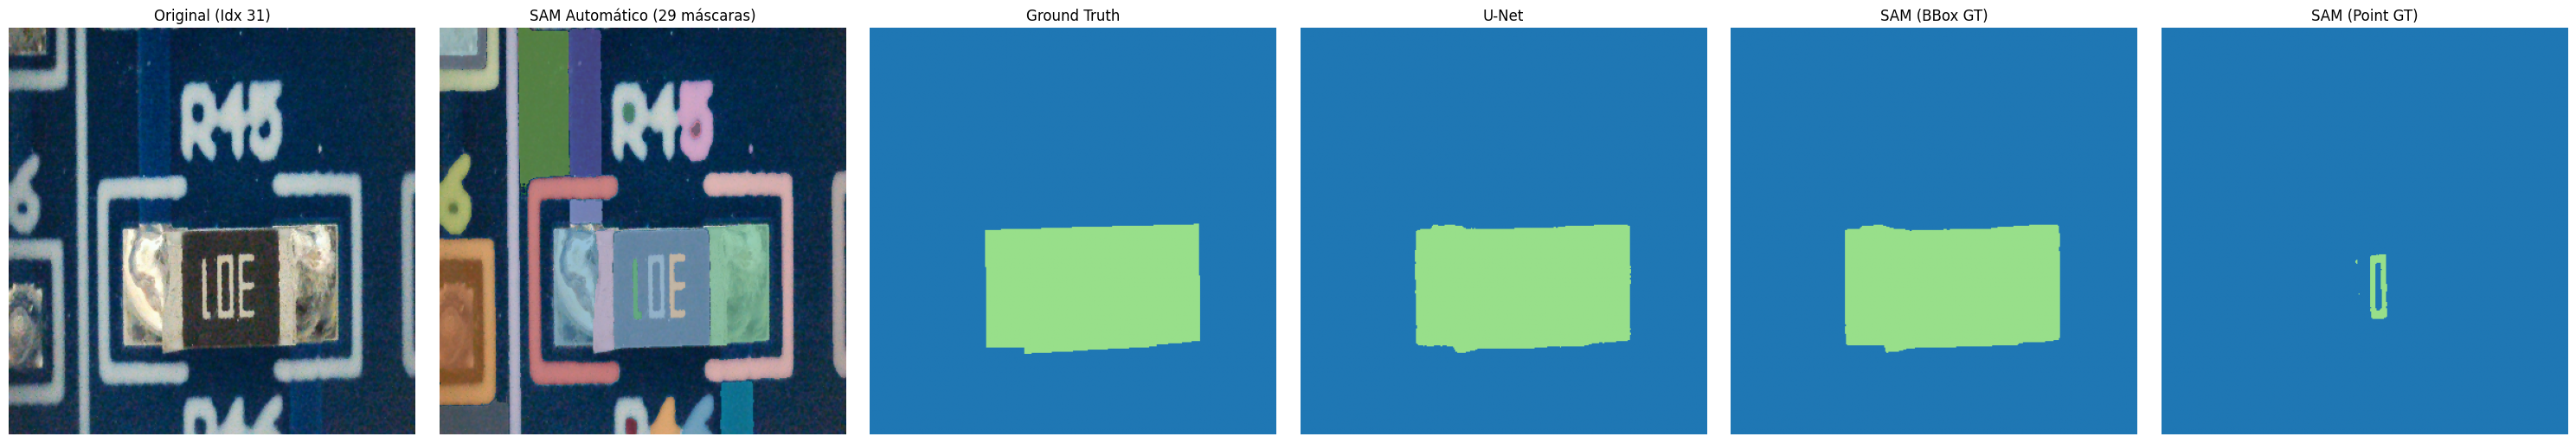


Procesando índice: 55


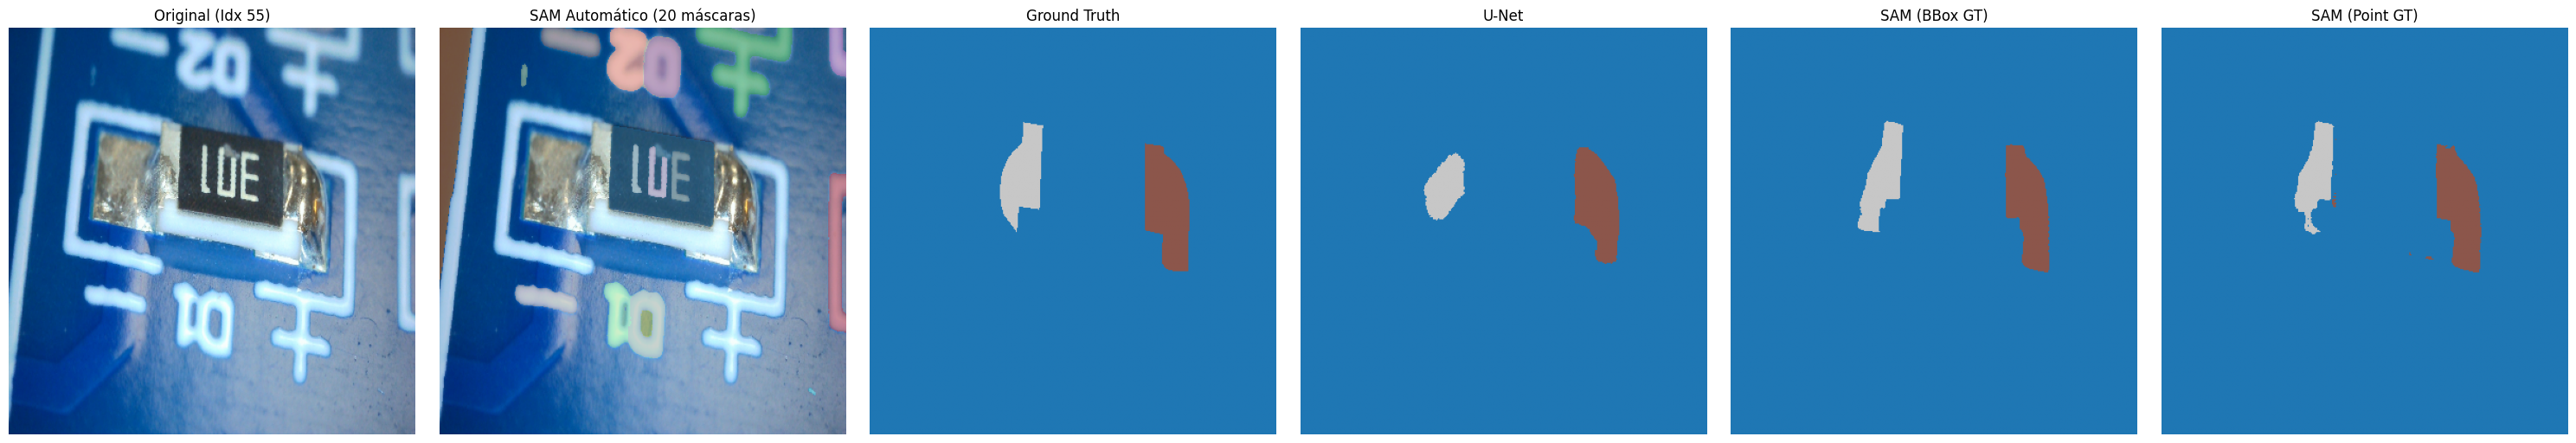


Procesando índice: 80


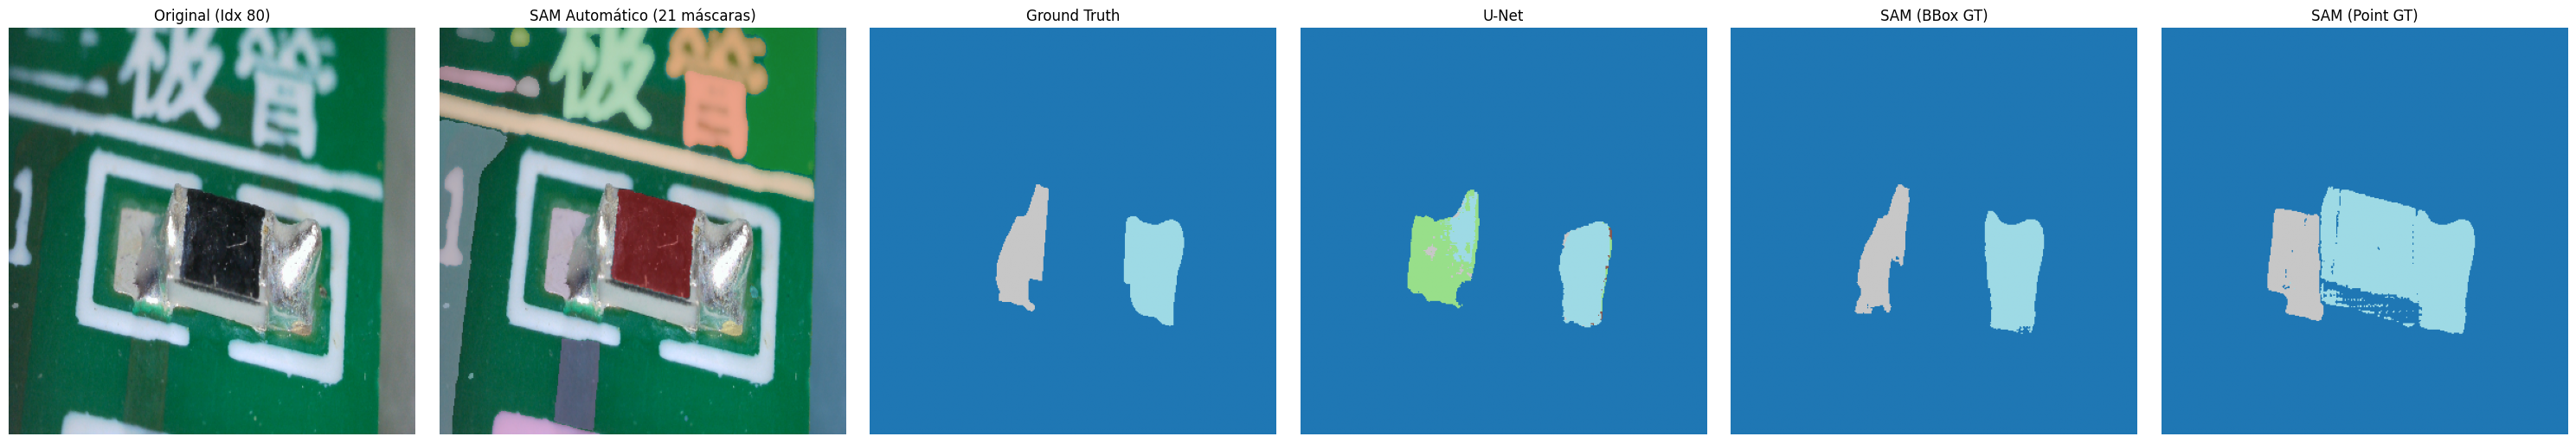


Visualización completada.


In [ ]:
# Imports necesarios para visualización y SAM automático
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
import os


# Función auxiliar MODIFICADA para mostrar máscaras automáticas con Colormap
def show_anns_cmap(anns, ax, cmap_name='tab20'):
    """Dibuja máscaras de segment_anything con colores de un colormap."""
    if len(anns) == 0: return
    if not isinstance(anns, list) or not all('segmentation' in ann for ann in anns):
         print("[WARN] Formato de 'anns' inesperado en show_anns_cmap.")
         return
    sorted_anns = sorted(anns, key=(lambda x: x.get('area', 0)), reverse=True)
    ax.set_autoscale_on(False)
    try:
        cmap = plt.get_cmap(cmap_name)
        num_colors = cmap.N
    except ValueError:
        print(f"[WARN] Colormap '{cmap_name}' no válido, usando 'tab20'.")
        cmap = plt.get_cmap('tab20')
        num_colors = cmap.N
    for i, ann in enumerate(sorted_anns):
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3), dtype=np.float32)
        color_mask = cmap(i % num_colors)[:3]
        for j in range(3): img[:,:,j] = color_mask[j]
        alpha_mask = np.where(m, 0.45, 0).astype(np.float32)
        ax.imshow(np.dstack((img, alpha_mask)))
print("Función show_anns_cmap (con colormap) definida.")
# ----------------------------------------------------

# --- Inicializar Generador Automático SAM ---
try:
    mask_generator = SamAutomaticMaskGenerator(sam_model)
    print("SamAutomaticMaskGenerator inicializado.")
except NameError:
    print("[ERROR] La variable 'sam_model' no está definida.")
    mask_generator = None
except Exception as e_gen:
    print(f"[ERROR] Inicializando SamAutomaticMaskGenerator: {e_gen}")
    mask_generator = None
# -----------------------------------------


# --- Elige qué imágenes visualizar ---
indices_para_visualizar = [31, 55, 80] # Ejemplo

print(f"\nGenerando visualizaciones para {len(indices_para_visualizar)} imágenes...")

# Iterar sobre los índices seleccionados
for idx in indices_para_visualizar:
    print(f"\nProcesando índice: {idx}")

    # --- 1. Cargar la muestra original del dataset ---
    try: image_tensor, mask_gt_tensor = eval_loader.dataset[idx]
    except Exception as e: print(f"  ERROR: No se pudo cargar la muestra {idx}: {e}"); continue

    # --- 2. Preparar datos para Visualización y Modelos ---
    # (Sin cambios)
    img_for_plot = image_tensor.cpu().numpy().transpose(1, 2, 0)
    mean = np.array([0.485, 0.456, 0.406]); std = np.array([0.229, 0.224, 0.225])
    img_for_plot = (std * img_for_plot + mean)
    img_for_plot = np.clip(img_for_plot * 255, 0, 255).astype(np.uint8)
    mask_gt_np = mask_gt_tensor.cpu().numpy().astype(np.uint8)
    if mask_gt_np.ndim == 3 and mask_gt_np.shape[0]==1: mask_gt_np = mask_gt_np.squeeze(0)
    img_for_sam_bgr = cv2.cvtColor(img_for_plot, cv2.COLOR_RGB2BGR)

    # --- 3. Obtener Predicción U-Net ---
    # (Sin cambios)
    unet_pred_np = np.zeros_like(mask_gt_np, dtype=np.uint8)
    try:
        with torch.no_grad():
            output_unet = model(image_tensor.unsqueeze(0).to(DEVICE)) # Usa 'model' o 'unet_model_eval'
            pred_unet = torch.argmax(output_unet, dim=1).squeeze(0).cpu()
            unet_pred_np = pred_unet.numpy().astype(np.uint8)
    except Exception as unet_err: print(f"  ERROR generando predicción U-Net: {unet_err}")

    # --- 4. Obtener Predicción SAM (BBOX Prompts GT) ---
    # (Sin cambios en el cálculo)
    sam_bbox_pred_mask_np = np.zeros_like(mask_gt_np, dtype=np.uint8)
    try:
        predictor.set_image(img_for_sam_bgr)
        bboxes_info = get_bboxes_from_mask(mask_gt_np, CLASS_MAPPING)
        for bbox_coords, class_id in bboxes_info:
            if not (0 < class_id < num_classes): continue
            masks_sam, scores, logits_sam = predictor.predict(box=bbox_coords, multimask_output=False)
            sam_bbox_pred_mask_np[masks_sam[0]] = class_id
    except Exception as sam_err: print(f"  ERROR generando predicción SAM (BBox): {sam_err}")

    # --- 5. Obtener Predicción SAM (POINT Prompts GT) ---
    # (Sin cambios en el cálculo)
    sam_point_pred_mask_np = np.zeros_like(mask_gt_np, dtype=np.uint8)
    try:
        predictor.set_image(img_for_sam_bgr)
        prompts_info = get_centroids_from_mask(mask_gt_np, CLASS_MAPPING)
        point_labels = np.array([1])
        for point_coords, class_id in prompts_info:
            if not (0 < class_id < num_classes): continue
            masks_sam, scores, logits_sam = predictor.predict(point_coords=point_coords, point_labels=point_labels, multimask_output=False)
            sam_point_pred_mask_np[masks_sam[0]] = class_id
    except Exception as sam_err: print(f"  ERROR generando predicción SAM (Point): {sam_err}")

    # --- 6. Obtener Predicción SAM (Automática) ---
    # (Sin cambios en el cálculo)
    auto_masks_data = []
    if mask_generator:
        try: auto_masks_data = mask_generator.generate(img_for_plot)
        except Exception as sam_err: print(f"  ERROR generando predicción SAM (Auto): {sam_err}")


    # --- 7. Visualizar Lado a Lado (6 Paneles) ---
    #     CAMBIANDO EL ORDEN DE PLOTEO
    # ----------------------------------------------
    fig, axes = plt.subplots(1, 6, figsize=(30, 5)) # 1 fila, 6 columnas

    # Panel 1: Imagen Original (axes[0])
    axes[0].imshow(img_for_plot); axes[0].set_title(f'Original (Idx {idx})'); axes[0].axis('off')

    # Panel 2: SAM Automático (axes[1]) --- ¡CAMBIADO DE POSICIÓN!
    axes[1].imshow(img_for_plot) # Fondo
    if auto_masks_data and mask_generator:
        show_anns_cmap(auto_masks_data, axes[1], cmap_name='tab20') # Dibujar encima
    axes[1].set_title(f'SAM Automático ({len(auto_masks_data)} máscaras)'); axes[1].axis('off')

    # Panel 3: Máscara Ground Truth (axes[2]) --- ¡CAMBIADO DE POSICIÓN!
    axes[2].imshow(mask_gt_np, cmap='tab20', vmin=0, vmax=num_classes-1); axes[2].set_title('Ground Truth'); axes[2].axis('off')

    # Panel 4: Predicción U-Net (axes[3]) --- ¡CAMBIADO DE POSICIÓN!
    axes[3].imshow(unet_pred_np, cmap='tab20', vmin=0, vmax=num_classes-1); axes[3].set_title('U-Net'); axes[3].axis('off')

    # Panel 5: Predicción SAM (Prompt BBox) (axes[4]) --- ¡CAMBIADO DE POSICIÓN!
    axes[4].imshow(sam_bbox_pred_mask_np, cmap='tab20', vmin=0, vmax=num_classes-1); axes[4].set_title('SAM (BBox GT)'); axes[4].axis('off')

    # Panel 6: Predicción SAM (Prompt Point) (axes[5]) --- ¡CAMBIADO DE POSICIÓN!
    axes[5].imshow(sam_point_pred_mask_np, cmap='tab20', vmin=0, vmax=num_classes-1); axes[5].set_title('SAM (Point GT)'); axes[5].axis('off')

    plt.tight_layout()
    plt.show()

print("\nVisualización completada.")

Generando visualizaciones para 3 imágenes...

Procesando índice: 31


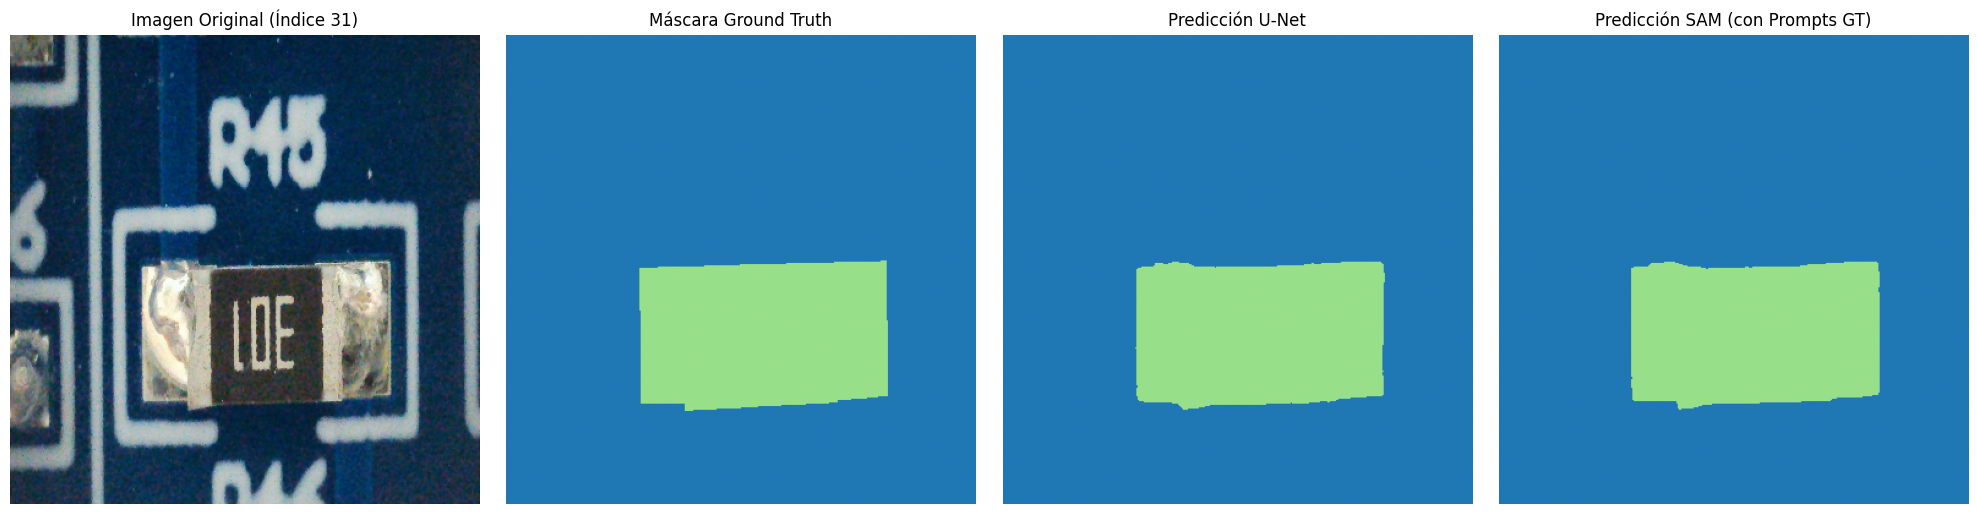


Procesando índice: 55


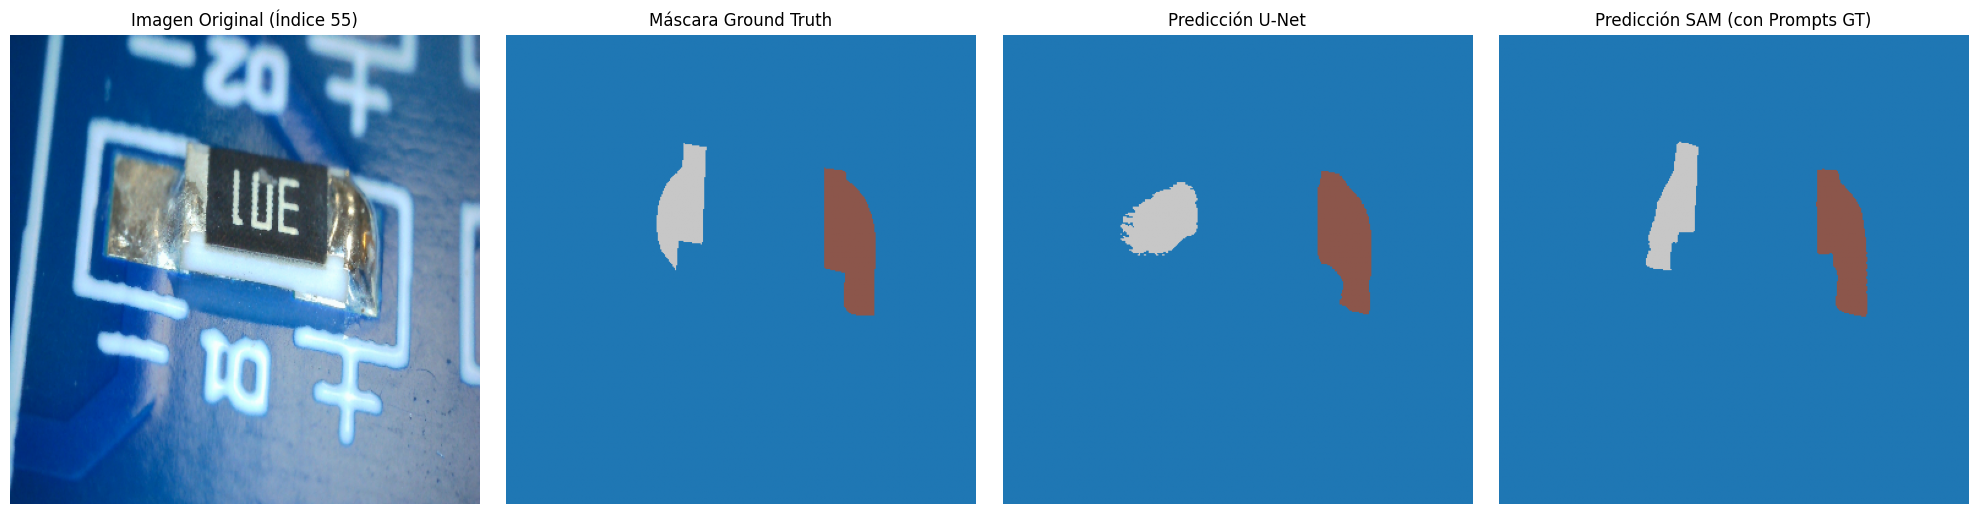


Procesando índice: 80


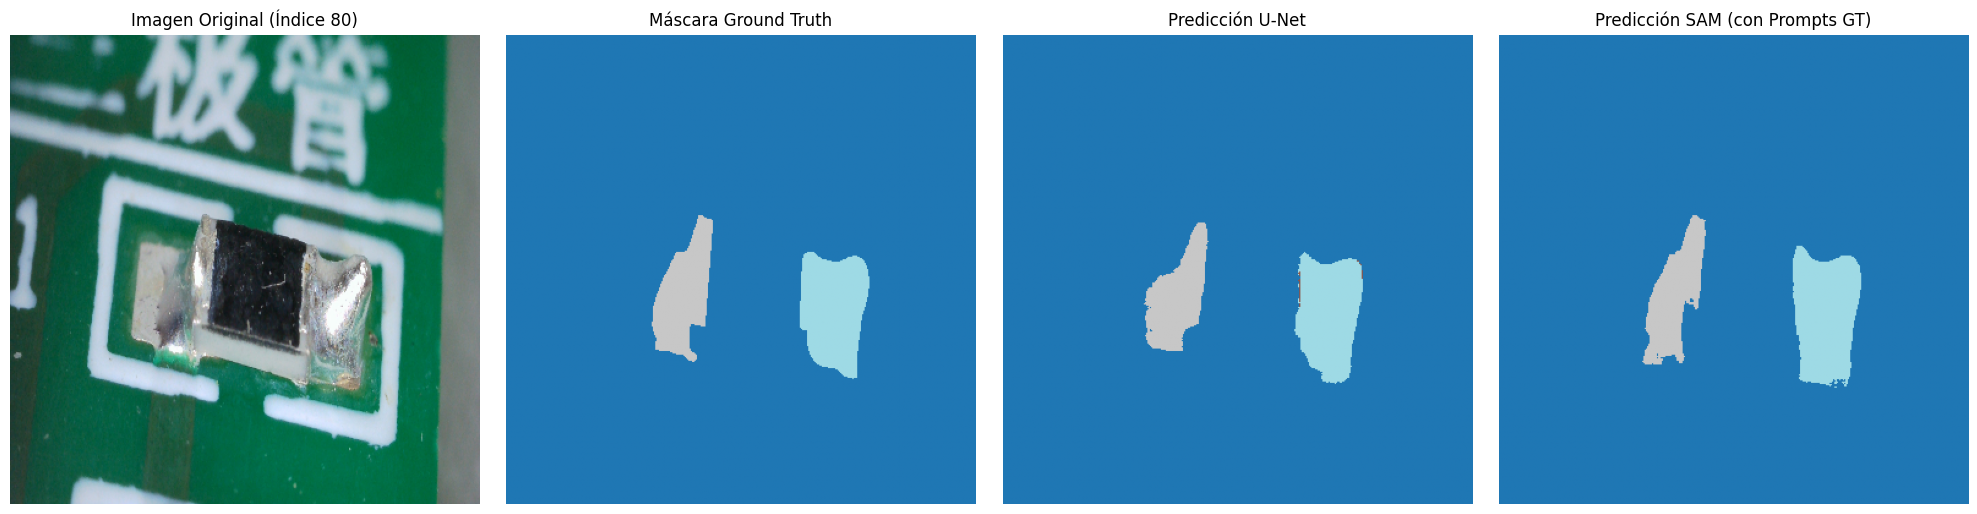


Visualización completada.


In [ ]:
# --- Imports necesarios para visualización ---
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2
# Asegúrate de tener acceso a estas variables/funciones de celdas anteriores:
# - unet_model (cargado, en .eval(), en DEVICE)
# - predictor (SamPredictor, cargado)
# - eval_loader (el DataLoader de validación)
# - DEVICE (ej. 'cuda')
# - num_classes (ej. 26)
# - CLASS_MAPPING
# - get_bboxes_from_mask (la función que definiste)
# -------------------------------------------------

# --- Elige qué imágenes visualizar ---
# Cambia estos índices por los que te interesen de tu conjunto de validación
indices_para_visualizar = [31, 55, 80] # Ejemplo

print(f"Generando visualizaciones para {len(indices_para_visualizar)} imágenes...")

# Iterar sobre los índices seleccionados
for idx in indices_para_visualizar:
    print(f"\nProcesando índice: {idx}")

    # --- 1. Cargar la muestra original del dataset ---
    # Accedemos directamente al dataset subyacente del loader
    # __getitem__ ya aplica el preprocesamiento (Resize, Normalize, ToTensorV2)
    try:
        image_tensor, mask_gt_tensor = eval_loader.dataset[idx]
        # Nota: Si tu __getitem__ devolviera más cosas (como img_name), ajústalo:
        # image_tensor, mask_gt_tensor, img_name = eval_loader.dataset[idx]
    except IndexError:
        print(f"  ERROR: Índice {idx} fuera de rango para el dataset ({len(eval_loader.dataset)} muestras). Saltando.")
        continue
    except Exception as e:
        print(f"  ERROR: No se pudo cargar la muestra {idx}: {e}")
        continue

    # --- 2. Preparar datos para Visualización y Modelos ---

    # Imagen Original (Desnormalizada para verla bien)
    # Mover a CPU, convertir a NumPy HWC, desnormalizar
    img_for_plot = image_tensor.cpu().numpy().transpose(1, 2, 0)
    mean = np.array([0.485, 0.456, 0.406]); std = np.array([0.229, 0.224, 0.225])
    img_for_plot = (std * img_for_plot + mean)
    img_for_plot = np.clip(img_for_plot * 255, 0, 255).astype(np.uint8)

    # Máscara Ground Truth (NumPy)
    mask_gt_np = mask_gt_tensor.cpu().numpy().astype(np.uint8) # Asegurar uint8
    if mask_gt_np.ndim == 3 and mask_gt_np.shape[0]==1: mask_gt_np = mask_gt_np.squeeze(0) # Quitar dim canal si existe

    # Imagen para SAM (BGR)
    img_for_sam_bgr = cv2.cvtColor(img_for_plot, cv2.COLOR_RGB2BGR)

    # --- 3. Obtener Predicción U-Net ---
    unet_pred_np = np.zeros_like(mask_gt_np, dtype=np.uint8) # Predicción vacía por defecto
    try:
        with torch.no_grad():
            # Añadir batch dim, mover a GPU, pasar por modelo
            input_tensor_unet = image_tensor.unsqueeze(0).to(DEVICE)
            output_unet = model(input_tensor_unet) # [1, C, H, W]
            # Argmax para obtener clases, quitar batch dim, mover a CPU
            pred_unet = torch.argmax(output_unet, dim=1).squeeze(0).cpu() # [H, W] LongTensor
            unet_pred_np = pred_unet.numpy().astype(np.uint8) # Convertir a NumPy uint8
    except Exception as unet_err:
        print(f"  ERROR generando predicción U-Net: {unet_err}")


    # --- 4. Obtener Predicción SAM (Reconstruida) ---
    sam_pred_mask_np = np.zeros_like(mask_gt_np, dtype=np.uint8) # Lienzo vacío
    try:
        # Establecer imagen en predictor
        predictor.set_image(img_for_sam_bgr)
        # Obtener bboxes del GT como prompts
        bboxes_info = get_bboxes_from_mask(mask_gt_np, CLASS_MAPPING)
        # Predecir para cada bbox y pintar
        for bbox_coords, class_id in bboxes_info:
            if not (0 < class_id < num_classes): continue
            masks_sam, scores, logits_sam = predictor.predict(box=bbox_coords, multimask_output=False)
            sam_pred_mask_np[masks_sam[0]] = class_id # Pintar con class_id
    except Exception as sam_err:
        print(f"  ERROR generando predicción SAM: {sam_err}")


    # --- 5. Visualizar Lado a Lado ---
    plt.figure(figsize=(20, 5)) # Ajusta tamaño si es necesario

    # a) Imagen Original
    plt.subplot(1, 4, 1)
    plt.imshow(img_for_plot)
    plt.title(f'Imagen Original (Índice {idx})')
    plt.axis('off')

    # b) Máscara Ground Truth
    plt.subplot(1, 4, 2)
    # Usar un colormap cualitativo bueno para clases discretas
    # 'tab20' o 'Paired' son buenas opciones. 'jet' puede ser confuso.
    # vmin/vmax aseguran que la escala de colores cubra todas las clases posibles
    plt.imshow(mask_gt_np, cmap='tab20', vmin=0, vmax=num_classes-1)
    plt.title('Máscara Ground Truth')
    plt.axis('off')

    # c) Predicción U-Net
    plt.subplot(1, 4, 3)
    plt.imshow(unet_pred_np, cmap='tab20', vmin=0, vmax=num_classes-1)
    plt.title('Predicción U-Net')
    plt.axis('off')

    # d) Predicción SAM
    plt.subplot(1, 4, 4)
    plt.imshow(sam_pred_mask_np, cmap='tab20', vmin=0, vmax=num_classes-1)
    plt.title('Predicción SAM (con Prompts GT)')
    plt.axis('off')

    plt.tight_layout() # Ajusta espaciado
    plt.show()

print("\nVisualización completada.")